# Parse 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
import jenkspy
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
0                  0.0               5.0              5.0             0.0   
1                  1.0               5.0              5.0             0.0   
2                  1.0               4.0              4.0             0.0   
3                  1.0               4.0              4.0             0.0   
4                  1.0               5.0              5.0             0.0   
...                ...               ...              ...             ...   
122405             1.0               2.0              4.0             0.0   
122406             1.0               5.0              5.0             0.0   
122407             1.0               5.0              5.0             0.0   
122408             1.0               5.0              5.0             0.0   
122409             1.0               4.0              5.0             0.0   

        t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  \
0                 0.0            0.0           0.0            0.0   
1                 0.0            0.0           0.0            0.0   
2                 0.0            0.0           0.0            0.0   
3                 0.0            0.0           0.0            0.0   
4                 0.0            0.0           0.0            0.0   
...               ...            ...           ...            ...   
122405            1.0            0.0           0.0            0.0   
122406            0.0            0.0           0.0            0.0   
122407            2.0            0.0           0.0            0.0   
122408            2.0            0.0           0.0            0.0   
122409            2.0            0.0           0.0            0.0   

        t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  ct_weapon_cz75auto  \
0                0.0              0.0             0.0                 0.0   
1                0.0              0.0             0.0                 0.0   
2                0.0              0.0             0.0                 0.0   
3                0.0              0.0             0.0                 0.

## preprocessing

## first method

In [3]:
Rifels = ['famas', 'aug', 'awp','elite', 'g3sg1', 'galilar', 'm4a1s', 'm4a4', 'ak47', 'scar20', 'sg553', 'ssg08']
Pistols = ['glock', 'r8revolver', 'deagle', 'fiveseven', 'usps', 'p250', 'p2000', 'tec9']
Heavy = ['m249','mag7', 'negev', 'nova', 'sawedoff', 'xm1014']
SMGs = ['bizon', 'cz75auto', 'mp5sd', 'mac10', 'mp7', 'mp9', 'p90', 'ump45']
Grenades = ['hegrenade', 'flashbang', 'smokegrenade', 'incendiarygrenade', 'molotovgrenade', 'decoygrenade']
group = ['t', 'ct']

In [4]:
df_weapon = pd.DataFrame(columns=['t_weapon_Rifels', 't_weapon_Pistols', 't_weapon_Heavy', 't_weapon_SMGs', 't_weapon_Grenades',
                          'ct_weapon_Rifels', 'ct_weapon_Pistols', 'ct_weapon_Heavy', 'ct_weapon_SMGs', 'ct_weapon_Grenades'])
t_Rifels = 0
ct_Rifels = 0
t_Pistols = 0
ct_Pistols = 0
t_Heavy = 0
ct_Heavy = 0
t_SMGs = 0
ct_SMGs = 0
t_Grenades = 0
ct_Grenades = 0
for col in df.columns:
    for type_rifels in Rifels:
        if col == 't_weapon_' + type_rifels:
            t_Rifels += df[col]
        if col == 'ct_weapon_' + type_rifels:
            ct_Rifels += df[col]
    for type_Pistols in Pistols:
        if col == 't_weapon_' + type_Pistols:
            t_Pistols += df[col]
        if col == 'ct_weapon_' + type_Pistols:
            ct_Pistols += df[col]
    for type_Heavy in Heavy:
        if col == 't_weapon_' + type_Heavy:
            t_Heavy += df[col]
        if col == 'ct_weapon_' + type_Heavy:
            ct_Heavy += df[col]
    for type_SMGs in SMGs:
        if col == 't_weapon_' + type_SMGs:
            t_SMGs += df[col]
        if col == 'ct_weapon_' + type_SMGs:
            ct_SMGs += df[col]
    for type_Grenades in Grenades:
        if col == 't_grenade_' + type_Grenades:
            t_Grenades += df[col]
        if col == 'ct_grenade_' + type_Grenades:
            ct_Grenades += df[col]

In [5]:
df_weapon["t_weapon_Rifels"] = t_Rifels.tolist()
df_weapon["ct_weapon_Rifels"] = ct_Rifels.tolist()
df_weapon["t_weapon_Pistols"] = t_Pistols.tolist()
df_weapon["ct_weapon_Pistols"] = ct_Pistols.tolist()
df_weapon["t_weapon_Heavy"] = t_Heavy.tolist()
df_weapon["ct_weapon_Heavy"] = ct_Heavy.tolist()
df_weapon["t_weapon_SMGs"] = t_SMGs.tolist()
df_weapon["ct_weapon_SMGs"] = ct_SMGs.tolist()
df_weapon["t_weapon_Grenades"] = t_Grenades.tolist()
df_weapon["ct_weapon_Grenades"] = ct_Grenades.tolist()

In [6]:
df_weapon

t_weapon_Rifels  t_weapon_Pistols  t_weapon_Heavy  t_weapon_SMGs  \
0                   0.0               5.0             0.0            0.0   
1                   0.0               5.0             0.0            0.0   
2                   0.0               4.0             0.0            0.0   
3                   0.0               4.0             0.0            0.0   
4                   0.0               5.0             0.0            0.0   
...                 ...               ...             ...            ...   
122405              4.0               4.0             0.0            0.0   
122406              2.0               5.0             0.0            0.0   
122407              4.0               5.0             0.0            0.0   
122408              5.0               5.0             0.0            0.0   
122409              5.0               5.0             0.0            0.0   

        t_weapon_Grenades  ct_weapon_Rifels  ct_weapon_Pistols  \
0                     0.0               0.0                5.0   
1                     2.0               0.0                5.0   
2                     2.0               0.0                4.0   
3                     0.0               0.0                4.0   
4                     0.0               0.0                5.0   
...                   ...               ...                ...   
122405                3.0               1.0                2.0   
122406                2.0               1.0                5.0   
122407               14.0               1.0                4.0   
122408               12.0               1.0                4.0   
122409                8.0               1.0                3.0   

        ct_weapon_Heavy  ct_weapon_SMGs  ct_weapon_Grenades  
0                   0.0             0.0                 0.0  
1                   0.0             0.0                 0.0  
2                   0.0             0.0                 0.0  
3                   0.0             0.0                 0.0  
4                   0.0             0.0                 0.0  
...                 ...             ...                 ...  
122405              0.0             1.0                 2.0  
122406              0.0             0.0                 2.0  
122407              0.0             1.0                10.0  
122408              0.0             1.0                 3.0  
122409              0.0             1.0                 0.0  

[122410 rows x 10 columns]

In [404]:
df_weapon.to_csv("weapons.csv")

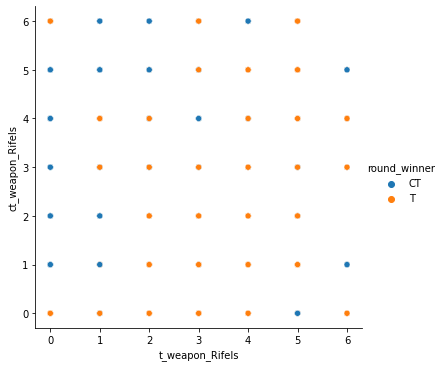

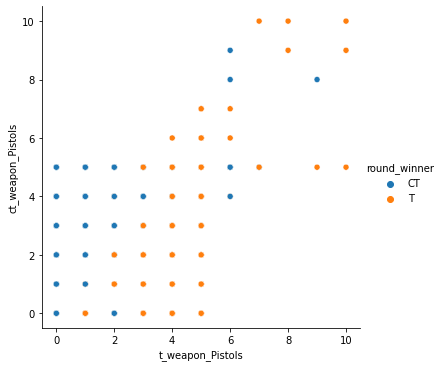

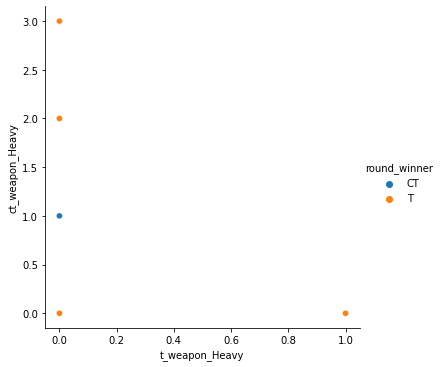

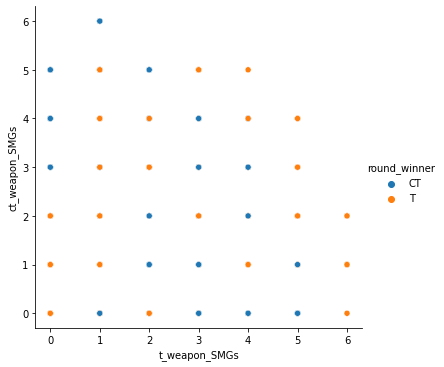

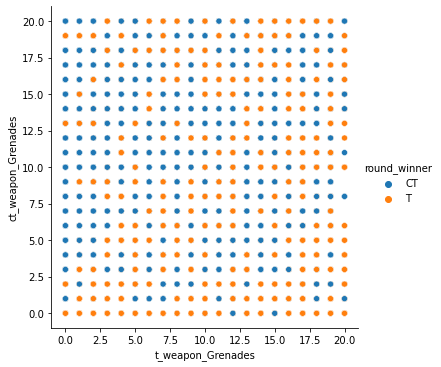

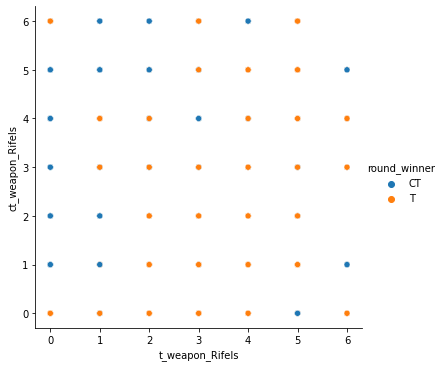

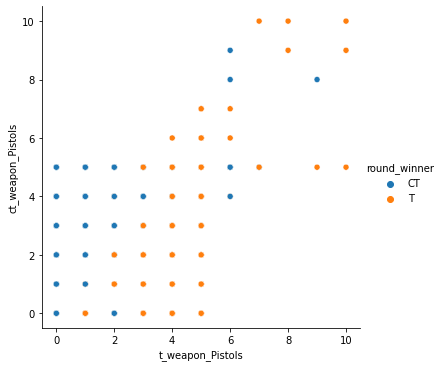

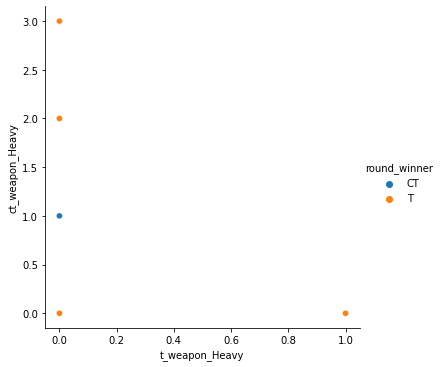

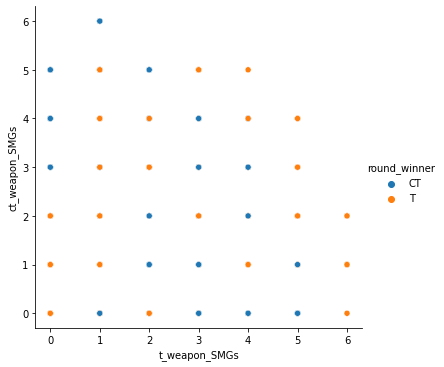

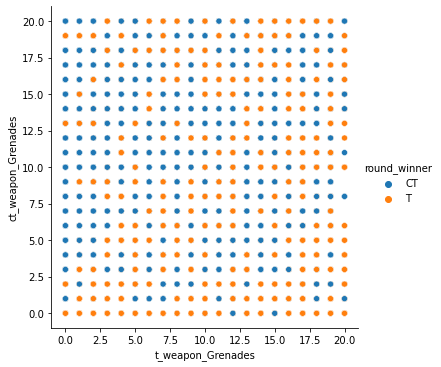

In [405]:
for col in df_weapon:
    spl=col.split("_")
    sns.relplot(x ="t_weapon_"+spl[2], y ="ct_weapon_"+spl[2], 
            hue =df.round_winner, data =df_weapon);
    

In [406]:
df["map"].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [407]:
weapon={"ak47":35,
        "aug" :28,
        "awp":115,
        "bizon":27,
        "famas":30,
        "elite":38,
        "g3sg1":80,
        "galilar":30,
        "glock":30,
        "m249":32,
        "m4a1s":38,
        "m4a4":33,
        "mac10":29,
        "mag7":30,
        "mp5sd":27,
        "mp7":29,
        "mp9":26,
        "negev":35,
        "nova":26,
        "p90":25,
        "r8revolver":86,
        "sawedoff":32,
        "scar20":80,
        "sg553":30,
        "ssg08":88,
        "ump45":35,
        "xm1014":20,
        "deagle":53,
        "fiveseven":31,
        "usps":35,
        "p250":38,
        "p2000":35,
        "tec9":33,
        "hegrenade":78,
        "flashbang":0,
        "smokegrenade":10,
        "incendiarygrenade":40,
        "molotovgrenade":40,
        "decoygrenade":25,
        "cz75auto":31
}

In [408]:
t_score_weapon=[]
ct_score_weapon=[]
sumt=0
sumct=0
i=0
for cols in df:
    colsp=cols.split("_")
    if(len(colsp)>2):
        if(colsp[1]=="weapon" or colsp[1]=="grenade"):
            if(colsp[0]=="t"):
                sumt+=(df[cols]*weapon[colsp[2]])
            else:
                sumct+=(df[cols]*weapon[colsp[2]])
sumct

        
        

0         175.0
1         175.0
2         140.0
3         140.0
4         175.0
          ...  
122405    139.0
122406    218.0
122407    484.0
122408    414.0
122409    205.0
Name: ct_weapon_ak47, Length: 122410, dtype: float64

In [409]:
sumt

0         150.0
1         170.0
2         140.0
3         125.0
4         150.0
          ...  
122405    356.0
122406    295.0
122407    638.0
122408    608.0
122409    558.0
Name: t_weapon_ak47, Length: 122410, dtype: float64

0         175.0
1         175.0
2         140.0
3         140.0
4         175.0
          ...  
122405    139.0
122406    218.0
122407    484.0
122408    414.0
122409    205.0
Name: ct_score_weapon, Length: 122410, dtype: float64

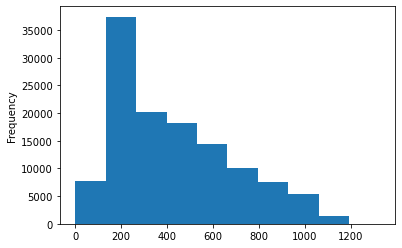

In [410]:
df["ct_score_weapon"]=sumct.tolist()
df["ct_score_weapon"].plot(kind="hist")
df["ct_score_weapon"]

0         150.0
1         170.0
2         140.0
3         125.0
4         150.0
          ...  
122405    356.0
122406    295.0
122407    638.0
122408    608.0
122409    558.0
Name: t_score_weapon, Length: 122410, dtype: float64

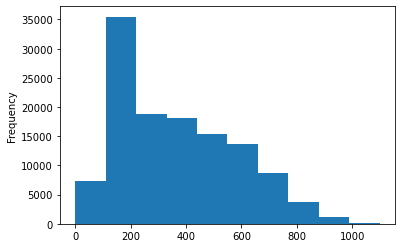

In [411]:
df["t_score_weapon"]=sumt.tolist()
df["t_score_weapon"].plot(kind="hist")
df["t_score_weapon"]

In [412]:
for cols in df:
    colsp=cols.split("_")
    if(len(colsp)>2):
        if(colsp[1]=="weapon" or colsp[1]=="grenade"):
            df.drop(cols, inplace=True, axis=1)
            
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  
0                 175.0           150.0  
1                 175.0           170.0  
2                 140.0           140.0  
3                 140.0           125.0  
4                 175.0           150.0  
...                 ...             ...  
122405            139.0           356.0  
122406            218.0           295.0  
122407            484.0           638.0  
122408            414.0           608.0  
122409            205.0           558.0  

[122410 rows x 19 columns]

In [413]:
df.to_csv("maindata.csv")

# find outliers

In [414]:
cols=["time_left","ct_score","t_score","ct_money","t_money","t_score_weapon","ct_score_weapon"]

## zscore

In [415]:
z = np.abs(stats.zscore(df[cols]))
data_clean = df[((z<3)&(z>-3)).all(axis=1)]
data_clean.shape

(118217, 19)

## IQR

In [416]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

time_left            111.9975
ct_score               7.0000
t_score                7.0000
ct_money           13300.0000
t_money            16450.0000
t_score_weapon       363.0000
ct_score_weapon      423.0000
dtype: float64

In [417]:
band=[Q1 - 1.5 * IQR,Q3 + 1.5 * IQR]
band

[time_left           -113.07625
 ct_score              -7.50000
 t_score               -7.50000
 ct_money          -18650.00000
 t_money           -23125.00000
 t_score_weapon      -384.50000
 ct_score_weapon     -456.50000
 dtype: float64,
 time_left            334.91375
 ct_score              20.50000
 t_score               20.50000
 ct_money           34550.00000
 t_money            42675.00000
 t_score_weapon      1067.50000
 ct_score_weapon     1235.50000
 dtype: float64]

In [418]:
delout= df[((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
delout

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
67         174.97       8.0      4.0  de_dust2         False      500.0   
71         174.97       9.0      4.0  de_dust2         False      500.0   
75          54.97       9.0      4.0  de_dust2         False      432.0   
76         174.96      10.0      4.0  de_dust2         False      500.0   
77         114.96      10.0      4.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122190     174.93      13.0     11.0  de_train         False      500.0   
122198     174.93      14.0     11.0  de_train         False      500.0   
122205     174.93      15.0     11.0  de_train         False      500.0   
122277     174.94       7.0      1.0  de_train         False      500.0   
122284     174.94       8.0      1.0  de_train         False      500.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
67         500.0     360.0      0.0   36500.0  25400.0         3.0        0.0   
71         500.0     369.0      0.0   44050.0  18050.0         4.0        0.0   
75         200.0     445.0    200.0   35250.0   3300.0         5.0        1.0   
76         500.0     377.0      0.0   51700.0  27100.0         4.0        0.0   
77         500.0     499.0    500.0   42550.0    700.0         5.0        5.0   
...          ...       ...      ...       ...      ...         ...        ...   
122190     500.0     196.0    470.0   50350.0  22600.0         2.0        5.0   
122198     500.0     193.0      0.0   47100.0  39900.0         2.0        0.0   
122205     500.0     200.0      0.0   44250.0  30950.0         2.0        0.0   
122277     500.0     371.0      0.0   44850.0  26400.0         3.0        0.0   
122284     500.0      84.0     99.0   49650.0  15400.0         0.0        0.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
67                 3.0               5.0              5.0           CT   
71                 4.0               5.0              5.0           CT   
75                 5.0               5.0              2.0           CT   
76                 4.0               5.0              5.0           CT   
77                 4.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122190             2.0               5.0              5.0            T   
122198             2.0               5.0              5.0           CT   
122205             2.0               5.0              5.0           CT   
122277             3.0               5.0              5.0           CT   
122284             1.0               5.0              5.0           CT   

        ct_score_weapon  t_score_weapon  
67                702.0           150.0  
71                725.0           150.0  
75                766.0           106.0  
76                738.0           150.0  
77               1112.0           708.0  
...                 ...             ...  
122190            249.0           455.0  
122198            383.0           150.0  
122205            368.0           150.0  
122277            491.0           150.0  
122284            205.0           265.0  

[7436 rows x 19 columns]

In [419]:
delout.shape

(7436, 19)

## boxplot

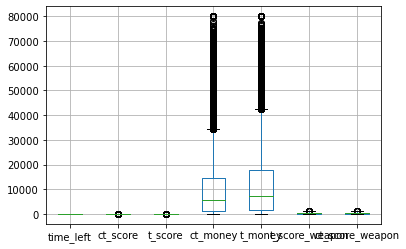

In [420]:
boxplot = df.boxplot(column=cols)  

## scatter plot

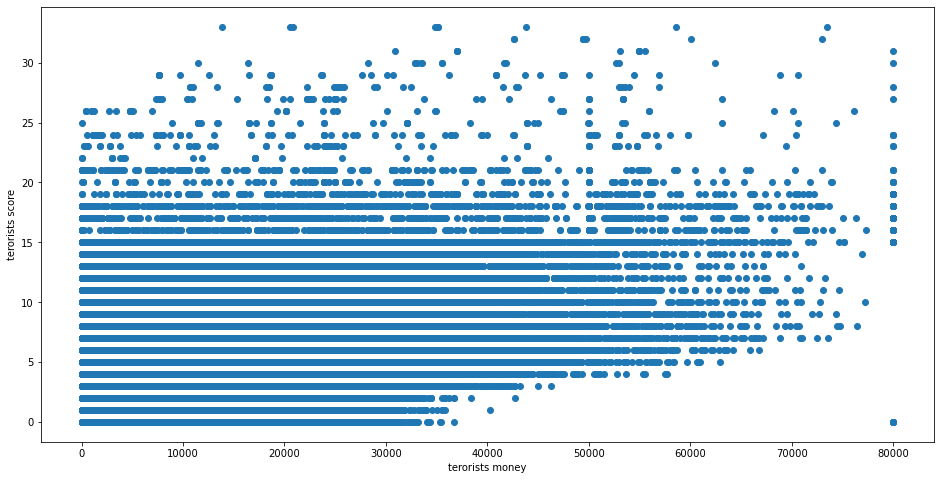

In [421]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['t_money'], df['t_score'])
ax.set_xlabel('terorists money')
ax.set_ylabel('terorists score')
plt.show()

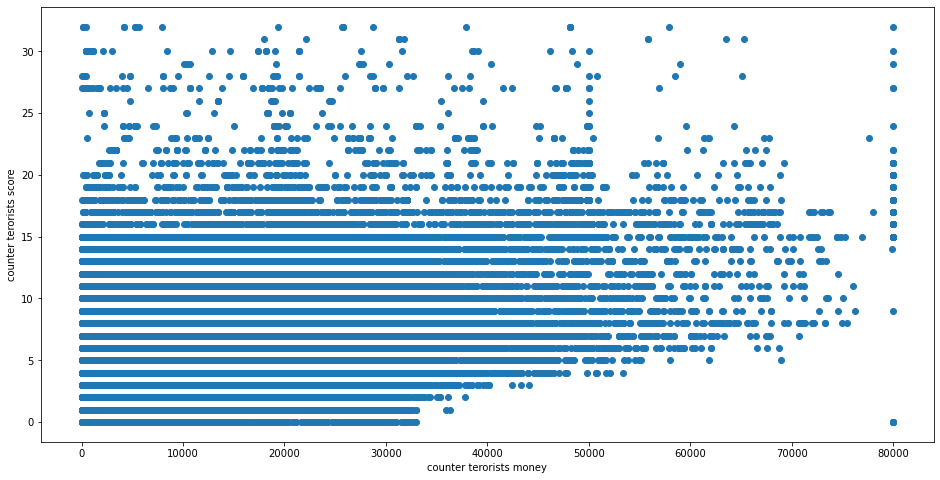

In [422]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ct_money'], df['ct_score'])
ax.set_xlabel('counter terorists money')
ax.set_ylabel('counter terorists score')
plt.show()

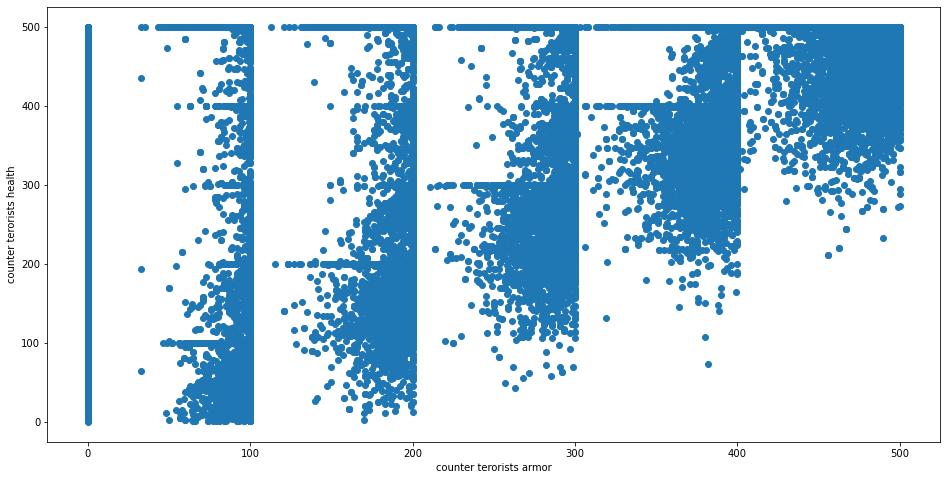

In [423]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ct_armor'], df['ct_health'])
ax.set_xlabel('counter terorists armor')
ax.set_ylabel('counter terorists health')
plt.show()

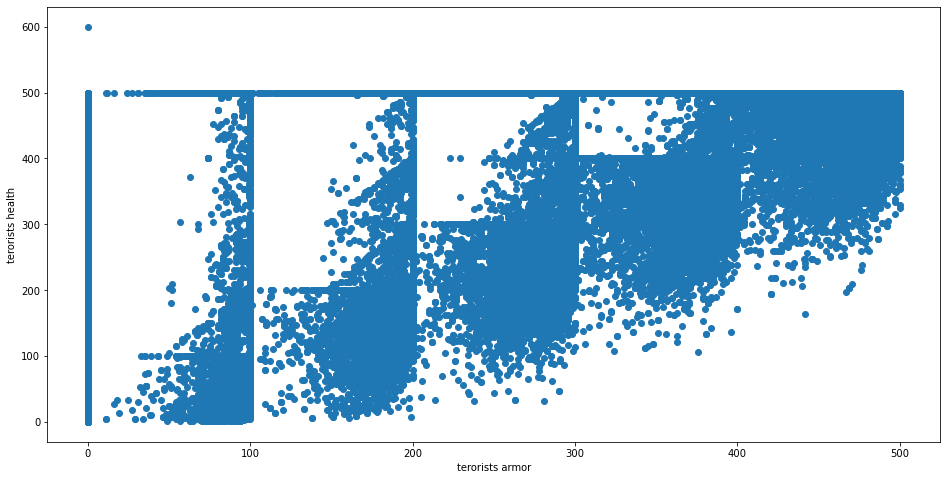

In [424]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['t_armor'], df['t_health'])
ax.set_xlabel('terorists armor')
ax.set_ylabel('terorists health')
plt.show()

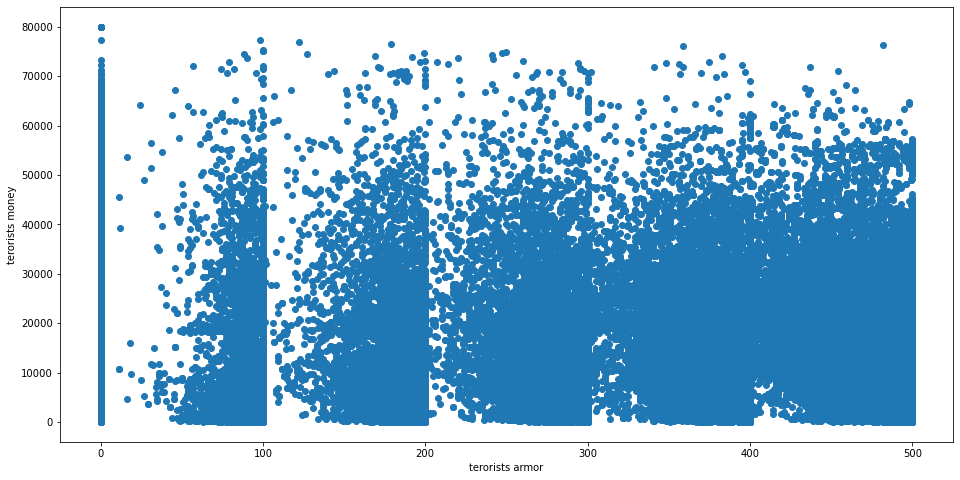

In [425]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['t_armor'], df['t_money'])
ax.set_xlabel('terorists armor')
ax.set_ylabel('terorists money')
plt.show()

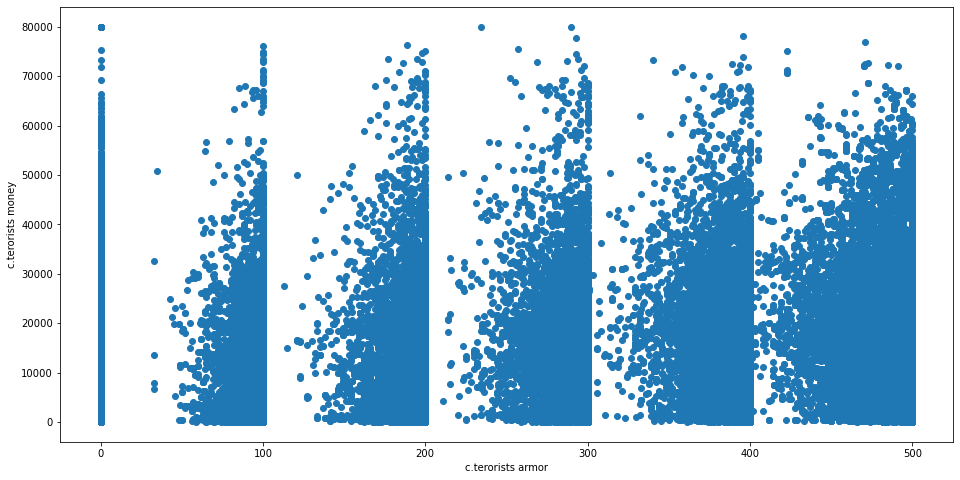

In [426]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ct_armor'], df['ct_money'])
ax.set_xlabel('c.terorists armor')
ax.set_ylabel('c.terorists money')
plt.show()

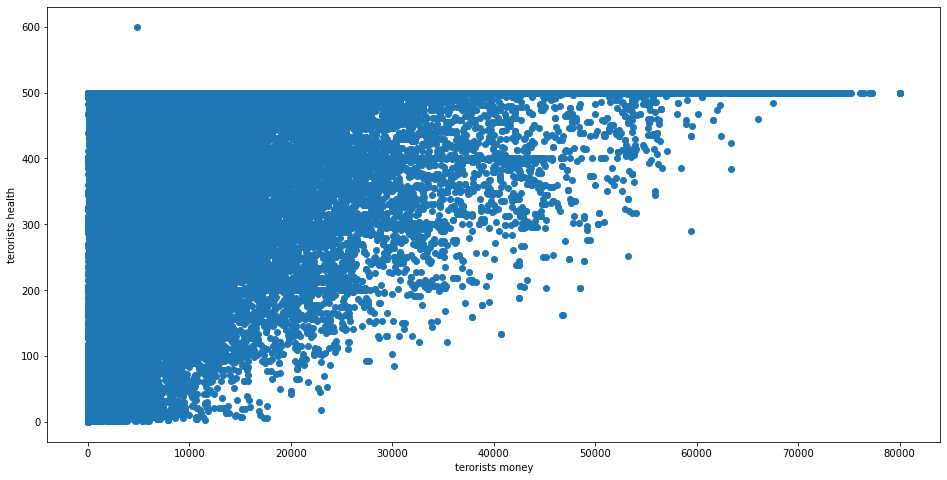

In [427]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['t_money'], df['t_health'])
ax.set_xlabel('terorists money')
ax.set_ylabel('terorists health')
plt.show()

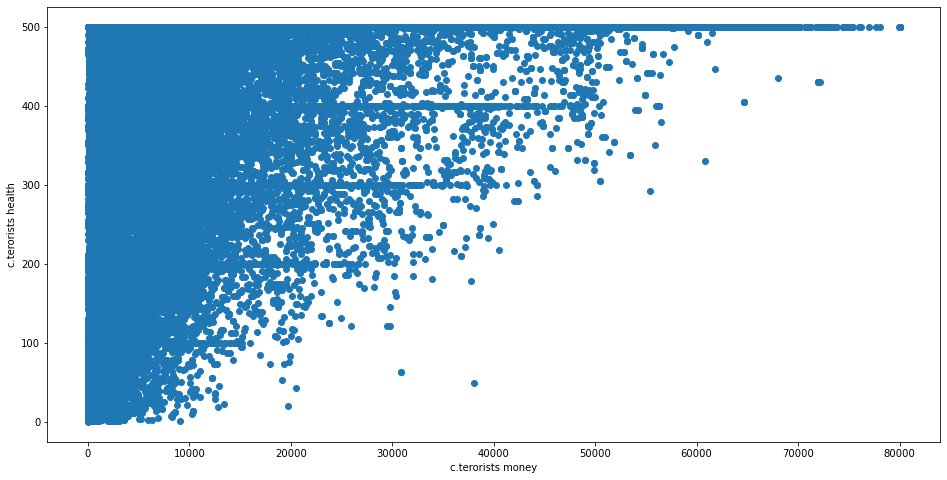

In [428]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ct_money'], df['ct_health'])
ax.set_xlabel('c.terorists money')
ax.set_ylabel('c.terorists health')
plt.show()

# missing values and infinite 

In [429]:
df.isnull().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
round_winner        0
ct_score_weapon     0
t_score_weapon      0
dtype: int64

# convert & standardization

zscore for normalization

In [430]:
df_zscore = pd.DataFrame()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

In [431]:
df_zscore = pd.DataFrame(zscore(newdf),columns="zscore_"+newdf.columns)
df_zscore

zscore_time_left  zscore_ct_score  zscore_t_score  zscore_ct_health  \
0               1.415828        -1.400576       -1.405702          0.664386   
1               1.067531        -1.400576       -1.405702          0.664386   
2              -0.034094        -1.400576       -1.405702         -0.159544   
3              -0.401302        -1.400576       -1.405702         -0.159544   
4               1.415277        -1.191823       -1.405702          0.664386   
...                  ...              ...             ...               ...   
122405         -1.514310         0.895711        1.496741         -1.603312   
122406          1.414542         0.895711        1.704058          0.664386   
122407          0.312918         0.895711        1.704058          0.664386   
122408         -0.054290         0.895711        1.704058          0.664386   
122409         -0.421498         0.895711        1.704058         -0.280488   

        zscore_t_health  zscore_ct_armor  zscore_t_armor  zscore_ct_money  \
0              0.695301        -1.836777       -1.709542        -0.516186   
1              0.695301         0.502008        0.008909        -0.819351   
2             -0.019401        -0.117770       -0.563908        -0.805977   
3             -0.019401        -0.117770       -0.563908        -0.805977   
4              0.695301        -0.714160       -1.709542         0.763351   
...                 ...              ...             ...              ...   
122405        -1.148630        -0.696619        0.346871        -0.863935   
122406         0.695301        -1.281315       -0.707112         0.152561   
122407         0.695301         1.057469        1.011339        -0.765852   
122408         0.695301         1.057469        1.011339        -0.765852   
122409         0.545214         0.472773        0.959785        -0.774768   

        zscore_t_money  zscore_ct_helmets  zscore_t_helmets  \
0            -0.595345          -1.115364         -1.379297   
1            -0.870776          -1.115364         -1.379297   
2            -0.883109          -1.115364         -1.379297   
3            -0.883109          -1.115364         -1.379297   
4            -0.040372          -1.115364         -1.379297   
...                ...                ...               ...   
122405       -0.435020          -0.029271          0.609855   
122406        1.040797          -0.572317         -0.384721   
122407       -0.373356           0.513776          1.107144   
122408       -0.373356           0.513776          1.107144   
122409       -0.348690          -0.029271          1.107144   

        zscore_ct_defuse_kits  zscore_ct_players_alive  \
0                   -1.004951                 0.602448   
1                   -0.382199                 0.602448   
2                   -0.382199                -0.227087   
3                   -0.382199                -0.227087   
4                   -0.382199                 0.602448   
...                       ...                      ...   
122405              -0.382199                -1.886156   
122406              -0.382199                 0.602448   
122407              -0.382199                 0.602448   
122408              -0.382199                 0.602448   
122409              -0.382199                -0.227087   

        zscore_t_players_alive  zscore_ct_score_weapon  zscore_t_score_weapon  
0                     0.597412               -0.951125              -0.990230  
1                     0.597412               -0.951125              -0.897195  
2                    -0.216709               -1.084439              -1.036748  
3                    -0.216709               -1.084439              -1.106524  
4                     0.597412               -0.951125              -0.990230  
...                        ...                     ...                    ...  
122405               -0.216709               -1.088248              -0.031967  
122406                0.597412          

In [539]:
df_zscore.to_csv("zscore.csv")

min max

In [433]:
df_min_max_scaled = newdf.copy()
df_minmax = pd.DataFrame()
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_minmax["minmax_"+column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    print(df_minmax["minmax_"+column])

0         1.000000
1         0.891594
2         0.548717
3         0.434425
4         0.999829
            ...   
122405    0.088005
122406    0.999600
122407    0.656723
122408    0.542431
122409    0.428139
Name: minmax_time_left, Length: 122410, dtype: float64
0         0.00000
1         0.00000
2         0.00000
3         0.00000
4         0.03125
           ...   
122405    0.34375
122406    0.34375
122407    0.34375
122408    0.34375
122409    0.34375
Name: minmax_ct_score, Length: 122410, dtype: float64
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
122405    0.424242
122406    0.454545
122407    0.454545
122408    0.454545
122409    0.454545
Name: minmax_t_score, Length: 122410, dtype: float64
0         1.000
1         1.000
2         0.782
3         0.782
4         1.000
          ...  
122405    0.400
122406    1.000
122407    1.000
122408    1.000
122409    0.750
Name: minmax_ct_health, Length: 122410, dtype:

In [434]:
df_minmax

minmax_time_left  minmax_ct_score  minmax_t_score  minmax_ct_health  \
0               1.000000          0.00000        0.000000             1.000   
1               0.891594          0.00000        0.000000             1.000   
2               0.548717          0.00000        0.000000             0.782   
3               0.434425          0.00000        0.000000             0.782   
4               0.999829          0.03125        0.000000             1.000   
...                  ...              ...             ...               ...   
122405          0.088005          0.34375        0.424242             0.400   
122406          0.999600          0.34375        0.454545             1.000   
122407          0.656723          0.34375        0.454545             1.000   
122408          0.542431          0.34375        0.454545             1.000   
122409          0.428139          0.34375        0.454545             0.750   

        minmax_t_health  minmax_ct_armor  minmax_t_armor  minmax_ct_money  \
0              0.833333            0.000           0.000         0.050000   
1              0.833333            0.800           0.600         0.007500   
2              0.666667            0.588           0.400         0.009375   
3              0.666667            0.588           0.400         0.009375   
4              0.833333            0.384           0.000         0.229375   
...                 ...              ...             ...              ...   
122405         0.403333            0.390           0.718         0.001250   
122406         0.833333            0.190           0.350         0.143750   
122407         0.833333            0.990           0.950         0.015000   
122408         0.833333            0.990           0.950         0.015000   
122409         0.798333            0.790           0.932         0.013750   

        minmax_t_money  minmax_ct_helmets  minmax_t_helmets  \
0             0.050000                0.0               0.0   
1             0.008125                0.0               0.0   
2             0.006250                0.0               0.0   
3             0.006250                0.0               0.0   
4             0.134375                0.0               0.0   
...                ...                ...               ...   
122405        0.074375                0.4               0.8   
122406        0.298750                0.2               0.4   
122407        0.083750                0.6               1.0   
122408        0.083750                0.6               1.0   
122409        0.087500                0.4               1.0   

        minmax_ct_defuse_kits  minmax_ct_players_alive  \
0                         0.0                      1.0   
1                         0.2                      1.0   
2                         0.2                      0.8   
3                         0.2                      0.8   
4                         0.2                      1.0   
...                       ...                      ...   
122405                    0.2                      0.4   
122406                    0.2                      1.0   
122407                    0.2                      1.0   
122408                    0.2                      1.0   
122409                    0.2                      0.8   

        minmax_t_players_alive  minmax_ct_score_weapon  minmax_t_score_weapon  
0                     0.833333                0.131876               0.136488  
1                     0.833333                0.131876               0.154686  
2                     0.666667                0.105501               0.127389  
3                     0.666667                0.105501               0.113740  
4                     0.833333                0.131876               0.136488  
...                        ...                     ...                    ...  
122405                0.666667                0.104748               0.323931  
122406                0.833333          

In [540]:
df_minmax.to_csv("minmax.csv")

In [7]:
df_weapon_minmax = pd.DataFrame()
for column in df_weapon:
    df_weapon_minmax["minmax_"+column] = (df_weapon[column] - df_weapon[column].min()) / (df_weapon[column].max() - df_weapon[column].min())    
    print(df_weapon_minmax["minmax_"+column])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
122405    0.666667
122406    0.333333
122407    0.666667
122408    0.833333
122409    0.833333
Name: minmax_t_weapon_Rifels, Length: 122410, dtype: float64
0         0.5
1         0.5
2         0.4
3         0.4
4         0.5
         ... 
122405    0.4
122406    0.5
122407    0.5
122408    0.5
122409    0.5
Name: minmax_t_weapon_Pistols, Length: 122410, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
122405    0.0
122406    0.0
122407    0.0
122408    0.0
122409    0.0
Name: minmax_t_weapon_Heavy, Length: 122410, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
122405    0.0
122406    0.0
122407    0.0
122408    0.0
122409    0.0
Name: minmax_t_weapon_SMGs, Length: 122410, dtype: float64
0         0.00
1         0.10
2         0.10
3         0.00
4         0.00
          ..

In [8]:
df_weapon_minmax

minmax_t_weapon_Rifels  minmax_t_weapon_Pistols  \
0                     0.000000                      0.5   
1                     0.000000                      0.5   
2                     0.000000                      0.4   
3                     0.000000                      0.4   
4                     0.000000                      0.5   
...                        ...                      ...   
122405                0.666667                      0.4   
122406                0.333333                      0.5   
122407                0.666667                      0.5   
122408                0.833333                      0.5   
122409                0.833333                      0.5   

        minmax_t_weapon_Heavy  minmax_t_weapon_SMGs  minmax_t_weapon_Grenades  \
0                         0.0                   0.0                      0.00   
1                         0.0                   0.0                      0.10   
2                         0.0                   0.0                      0.10   
3                         0.0                   0.0                      0.00   
4                         0.0                   0.0                      0.00   
...                       ...                   ...                       ...   
122405                    0.0                   0.0                      0.15   
122406                    0.0                   0.0                      0.10   
122407                    0.0                   0.0                      0.70   
122408                    0.0                   0.0                      0.60   
122409                    0.0                   0.0                      0.40   

        minmax_ct_weapon_Rifels  minmax_ct_weapon_Pistols  \
0                      0.000000                       0.5   
1                      0.000000                       0.5   
2                      0.000000                       0.4   
3                      0.000000                       0.4   
4                      0.000000                       0.5   
...                         ...                       ...   
122405                 0.166667                       0.2   
122406                 0.166667                       0.5   
122407                 0.166667                       0.4   
122408                 0.166667                       0.4   
122409                 0.166667                       0.3   

        minmax_ct_weapon_Heavy  minmax_ct_weapon_SMGs  \
0                          0.0               0.000000   
1                          0.0               0.000000   
2                          0.0               0.000000   
3                          0.0               0.000000   
4                          0.0               0.000000   
...                        ...                    ...   
122405                     0.0               0.166667   
122406                     0.0               0.000000   
122407                     0.0               0.166667   
122408                     0.0               0.166667   
122409                     0.0               0.166667   

        minmax_ct_weapon_Grenades  
0                            0.00  
1                            0.00  
2                            0.00  
3                            0.00  
4                            0.00  
...                           ...  
122405                       0.10  
122406                       0.10  
122407                       0.50  
122408                       0.15  
122409                       0.00  

[122410 rows x 10 columns]

In [10]:
df_weapon_minmax.to_csv("weapons_minmax.csv")

In [436]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'round_winner', 'ct_score_weapon', 't_score_weapon'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

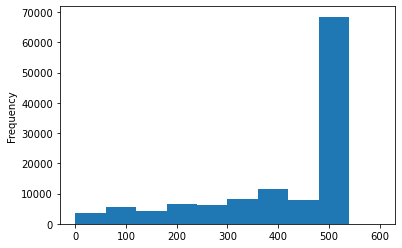

In [437]:
df["t_health"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

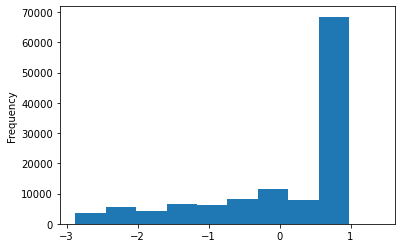

In [438]:
df_zscore["zscore_t_health"].plot(kind="hist")

<AxesSubplot:>

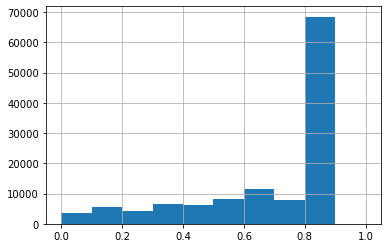

In [439]:
df_minmax["minmax_t_health"].hist()

<AxesSubplot:ylabel='Frequency'>

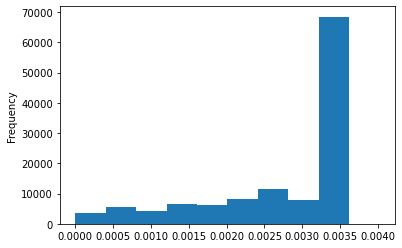

In [440]:
arr=np.array(df["t_health"])
x=preprocessing.normalize([arr])
x
df["norm_t_health"]=x[0].tolist()
df["norm_t_health"].plot(kind="hist")

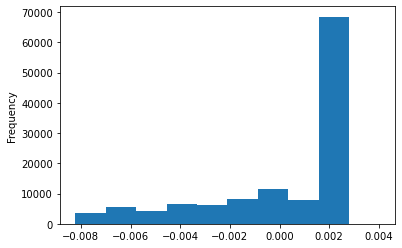

In [441]:
arr=np.array(df_zscore["zscore_t_health"])
x=preprocessing.normalize([arr])
x
df_zscore["norm_t_health"]=x[0].tolist()
df_zscore["norm_t_health"].plot(kind="hist")
d = preprocessing.normalize(zscoreitem, axis=0)

In [442]:
x[0]

array([ 1.98730554e-03,  1.98730554e-03, -5.54506253e-05, ...,
        1.98730554e-03,  1.98730554e-03,  1.55832675e-03])

In [443]:
df_zscore["norm_t_health"]

0         0.001987
1         0.001987
2        -0.000055
3        -0.000055
4         0.001987
            ...   
122405   -0.003283
122406    0.001987
122407    0.001987
122408    0.001987
122409    0.001558
Name: norm_t_health, Length: 122410, dtype: float64

In [444]:
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  norm_t_health  
0                 175.0           150.0       0.003352  
1                 175.0           170.0       0.003352  
2                 140.0           140.0       0.002682  
3                 140.0           125.0       0.002682  
4                 175.0           150.0       0.003352  
...                 ...             ...            ...  
122405            139.0           356.0       0.001622  
122406            218.0           295.0       0.003352  
122407            484.0           638.0       0.003352  
122408            414.0           608.0       0.003352  
122409            205.0           558.0       0.003211  

[122410 rows x 20 columns]

# reclassifing and binning

In [445]:
df = pd.concat([df, df_weapon], axis=1)
df


time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  norm_t_health  t_weapon_Rifels  \
0                 175.0           150.0       0.003352              0.0   
1                 175.0           170.0       0.003352              0.0   
2                 140.0           140.0       0.002682              0.0   
3                 140.0           125.0       0.002682              0.0   
4                 175.0           150.0       0.003352              0.0   
...                 ...             ...            ...              ...   
122405            139.0           356.0       0.001622              4.0   
122406            218.0           295.0       0.003352              2.0   
122407            484.0           638.0       0.003352              4.0   
122408            414.0           608.0       0.003352              5.0   
122409            205.0           558.0       0.003211              5.0   

        t_weapon_Pistols  t_weapon_Heavy  t_weapon_SMGs  t_weapon_Grenades  \
0                    5.0             0.0            0.0                0.0   
1                    5.0             0.0            0.0                2.0   
2                    4.0             0.0            0.0                2.0   
3                    4.0        

<AxesSubplot:>

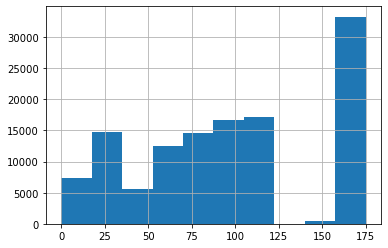

In [446]:
df["time_left"].hist()

cut jenks

In [447]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left"]

In [448]:
label5=['very_low',"low", 'mid','high',"very_high"]
label3=["low", 'mid','high']
label2=['low', 'high']

mohasebat ziadi darad baraye anjam an az halat kament kharej sazid

In [449]:
# for col in column:
#     try:
#         breaks2 = jenkspy.jenks_breaks(df[col], nb_class=2)
#         print(str(len(breaks2))+"  "+col)
#         breaks3 = jenkspy.jenks_breaks(df[col], nb_class=3)
#         print(str(len(breaks3))+"  "+col)
#         breaks5 = jenkspy.jenks_breaks(df[col], nb_class=5)
#         print(str(len(breaks5))+"  "+col)
#         df_jenkspy[col+"_catjenks2"] = pd.cut(df[col],bins=breaks2,labels=label2,duplicates='drop')
#         df_jenkspy[col+"_catjenks3"] = pd.cut(df[col],bins=breaks3,labels=label3,duplicates='drop')
#         df_jenkspy[col+"_catjenks5"] = pd.cut(df[col],bins=breaks5,labels=label5,duplicates='drop')
#     except Exception as e:
#         print("eror in col "+col+str(e))

cut,equal distance

In [450]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left","ct_defuse_kits","t_helmets","ct_helmets"]

In [451]:
df_cut = pd.DataFrame()

In [452]:
for col in column:
    df_cut[col+"_catcut2"] = pd.cut(df[col],bins=2,labels=label2)
    df_cut[col+"_catcut3"] = pd.cut(df[col],bins=3,labels=label3)
    df_cut[col+"_catcut5"] = pd.cut(df[col],bins=5,labels=label5)

In [453]:
df_cut

ct_score_weapon_catcut2 ct_score_weapon_catcut3  \
0                          low                     low   
1                          low                     low   
2                          low                     low   
3                          low                     low   
4                          low                     low   
...                        ...                     ...   
122405                     low                     low   
122406                     low                     low   
122407                     low                     mid   
122408                     low                     low   
122409                     low                     low   

       ct_score_weapon_catcut5 t_score_weapon_catcut2 t_score_weapon_catcut3  \
0                     very_low                    low                    low   
1                     very_low                    low                    low   
2                     very_low                    low                    low   
3                     very_low                    low                    low   
4                     very_low                    low                    low   
...                        ...                    ...                    ...   
122405                very_low                    low                    low   
122406                very_low                    low                    low   
122407                     low                   high                    mid   
122408                     low                   high                    mid   
122409                very_low                   high                    mid   

       t_score_weapon_catcut5 t_players_alive_catcut2 t_players_alive_catcut3  \
0                    very_low                    high                    high   
1                    very_low                    high                    high   
2                    very_low                    high                     mid   
3                    very_low                    high                     mid   
4                    very_low                    high                    high   
...                       ...                     ...                     ...   
122405                    low                    high                     mid   
122406                    low                    high                    high   
122407                    mid                    high                    high   
122408                    mid                    high                    high   
122409                    mid                    high                    high   

       t_players_alive_catcut5 ct_players_alive_catcut2  \
0                    very_high                     high   
1                    very_high                     high   
2                         high                     high   
3                         high                     high   
4                    very_high                     high   
...                        ...                      ...   
122405                    high                      low   
122406               very_high                     high   
122407               very_high                     high   
122408               very_high                     high   
122409               very_high                     high   

       ct_players_alive_catcut3 ct_players_alive_catcut5 t_money_catcut2  \
0                          high                very_high             low   
1                          high                very_high             low   
2                          high                     high             low   
3                          high                     high             low   
4                          high                very_high             low   
...                         ...                      ...             ...   
122405                      mid                      low             low   
122406                     high                very_high   

In [454]:
df_cut.to_csv("category_cut.csv")

In [455]:
df_qcut = pd.DataFrame()

equal bin

In [456]:
for col in column:
    df_qcut[col+"_catqcut2"] =  pd.qcut(df[col],q=3,duplicates='drop')
    df_qcut[col+"_catqcut3"] =  pd.qcut(df[col], q=5,duplicates='drop')
    df_qcut[col+"_catqcut5"] =  pd.qcut(df[col], q=7,duplicates='drop')
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  norm_t_health  t_weapon_Rifels  \
0                 175.0           150.0       0.003352              0.0   
1                 175.0           170.0       0.003352              0.0   
2                 140.0           140.0       0.002682              0.0   
3                 140.0           125.0       0.002682              0.0   
4                 175.0           150.0       0.003352              0.0   
...                 ...             ...            ...              ...   
122405            139.0           356.0       0.001622              4.0   
122406            218.0           295.0       0.003352              2.0   
122407            484.0           638.0       0.003352              4.0   
122408            414.0           608.0       0.003352              5.0   
122409            205.0           558.0       0.003211              5.0   

        t_weapon_Pistols  t_weapon_Heavy  t_weapon_SMGs  t_weapon_Grenades  \
0                    5.0             0.0            0.0                0.0   
1                    5.0             0.0            0.0                2.0   
2                    4.0             0.0            0.0                2.0   
3                    4.0        

<AxesSubplot:>

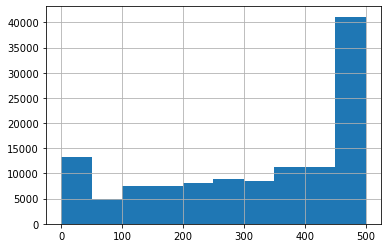

In [457]:
df["ct_armor"].hist()

<AxesSubplot:>

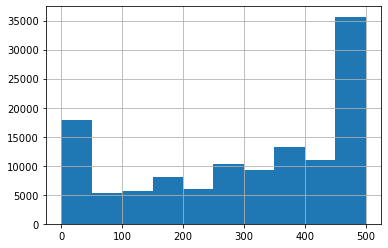

In [458]:
df["t_armor"].hist()

# EDA

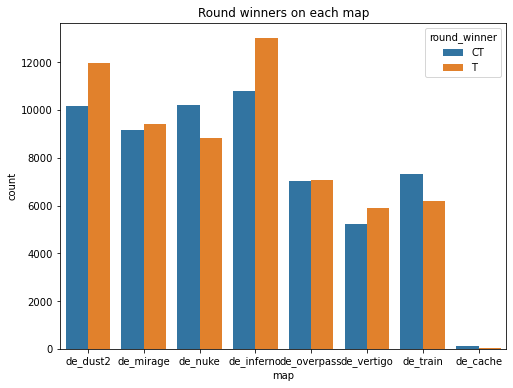

In [459]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=df)
ax.set(title='Round winners on each map')
plt.show()

In [460]:
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  norm_t_health  t_weapon_Rifels  \
0                 175.0           150.0       0.003352              0.0   
1                 175.0           170.0       0.003352              0.0   
2                 140.0           140.0       0.002682              0.0   
3                 140.0           125.0       0.002682              0.0   
4                 175.0           150.0       0.003352              0.0   
...                 ...             ...            ...              ...   
122405            139.0           356.0       0.001622              4.0   
122406            218.0           295.0       0.003352              2.0   
122407            484.0           638.0       0.003352              4.0   
122408            414.0           608.0       0.003352              5.0   
122409            205.0           558.0       0.003211              5.0   

        t_weapon_Pistols  t_weapon_Heavy  t_weapon_SMGs  t_weapon_Grenades  \
0                    5.0             0.0            0.0                0.0   
1                    5.0             0.0            0.0                2.0   
2                    4.0             0.0            0.0                2.0   
3                    4.0        

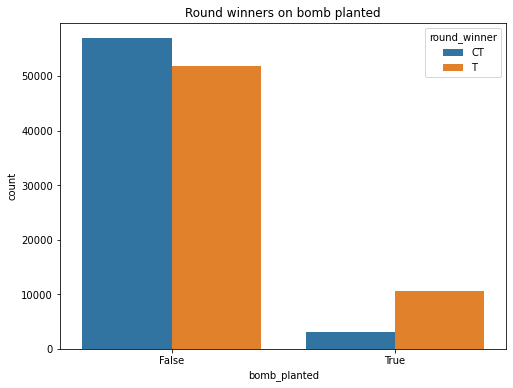

In [461]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="bomb_planted", hue="round_winner", data=df)
ax.set(title='Round winners on bomb planted')
plt.show()

<AxesSubplot:xlabel='ct_defuse_kits'>

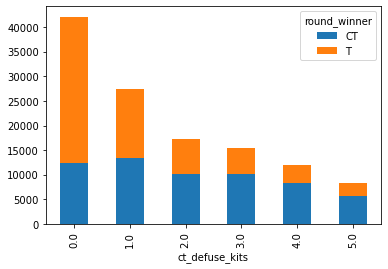

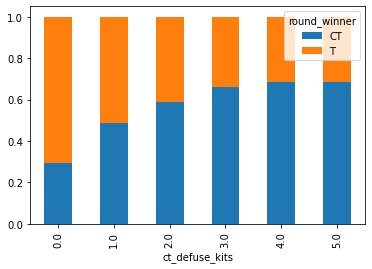

In [462]:
crosstab_01 = pd.crosstab(df["ct_defuse_kits"], df["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

## need normalize

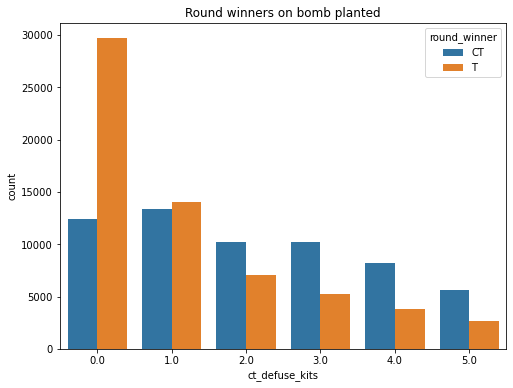

In [463]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_defuse_kits", hue="round_winner", data=df)
ax.set(title='Round winners on bomb planted')
plt.show()

In [464]:
y = df["round_winner"]
df_cut = df_cut.join(y)

In [465]:
df_qcut = df_qcut.join(y)

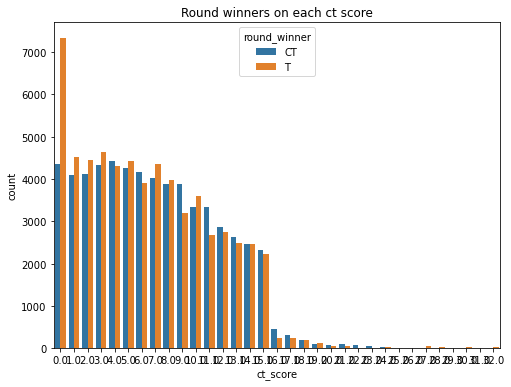

In [466]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_score", hue="round_winner", data=df)
ax.set(title='Round winners on each ct score')
plt.show()

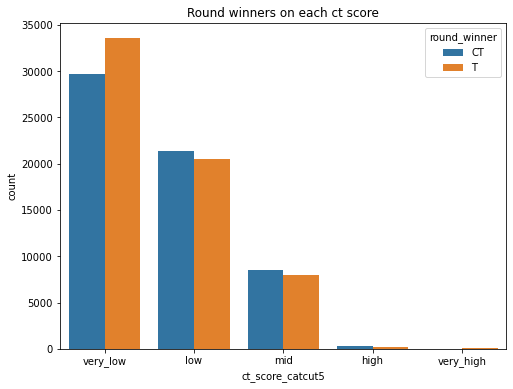

In [467]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_score_catcut5", hue="round_winner", data=df_cut)
ax.set(title='Round winners on each ct score')
plt.show()

<AxesSubplot:xlabel='ct_score_catcut5'>

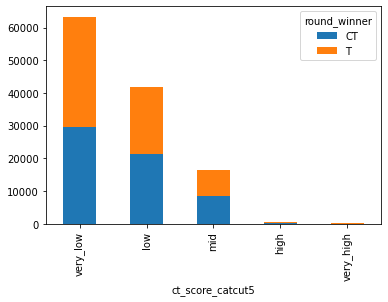

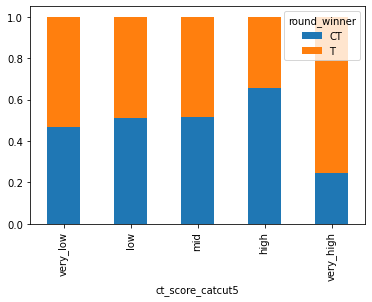

In [468]:
crosstab_01 = pd.crosstab(df_cut["ct_score_catcut5"], df_cut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

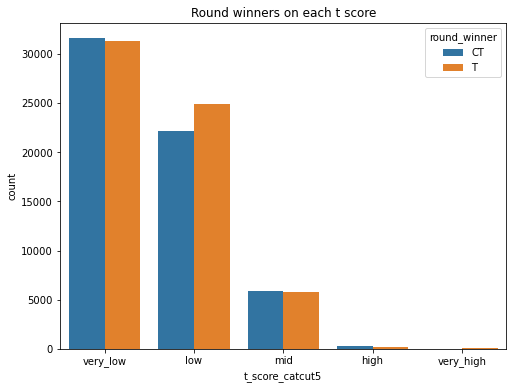

In [469]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="t_score_catcut5", hue="round_winner", data=df_cut)
ax.set(title='Round winners on each t score')
plt.show()

<AxesSubplot:xlabel='t_score_catqcut5'>

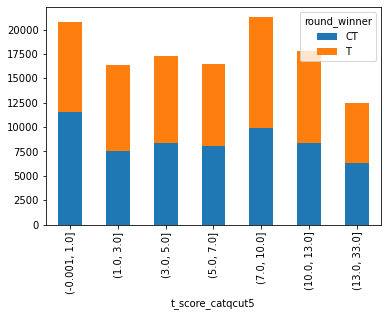

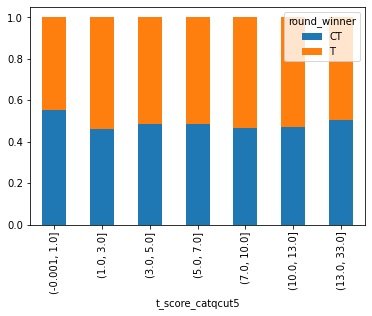

In [470]:
crosstab_01 = pd.crosstab(df_qcut["t_score_catqcut5"], df_qcut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

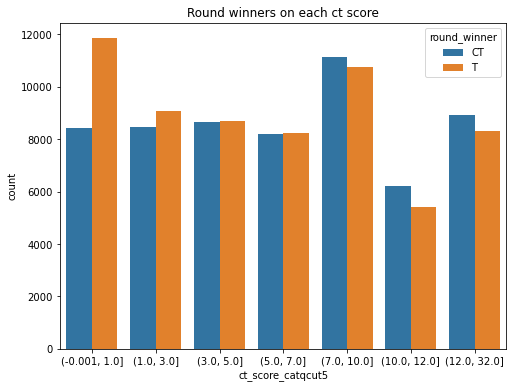

In [471]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_score_catqcut5", hue="round_winner", data=df_qcut)
ax.set(title='Round winners on each ct score')
plt.show()

<AxesSubplot:xlabel='ct_money_catcut5'>

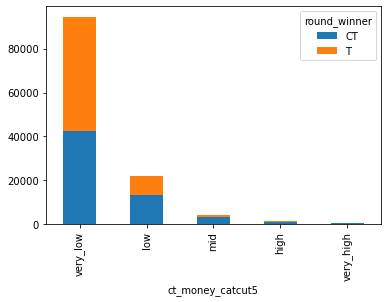

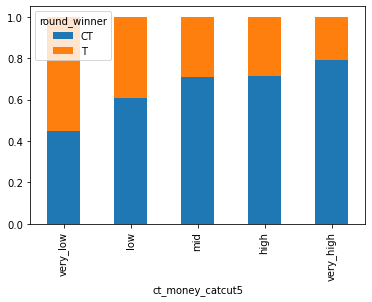

In [472]:
crosstab_01 = pd.crosstab(df_cut["ct_money_catcut5"], df_cut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='t_money_catcut5'>

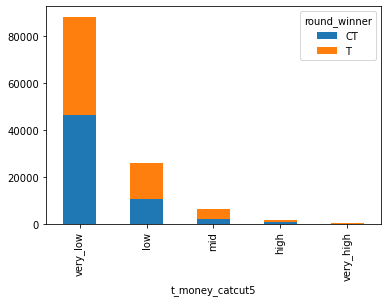

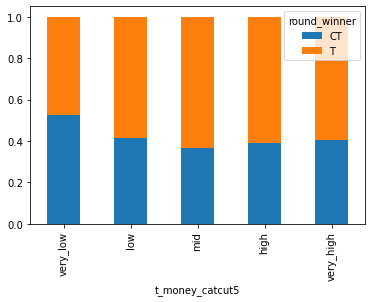

In [473]:
crosstab_01 = pd.crosstab(df_cut["t_money_catcut5"], df_cut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='t_score_weapon_catcut5'>

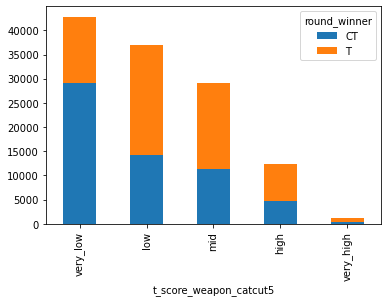

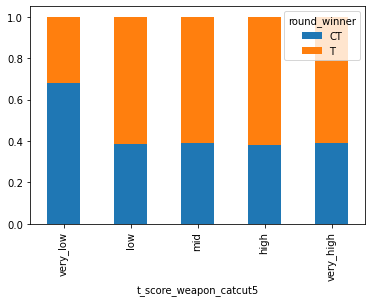

In [474]:
crosstab_01 = pd.crosstab(df_cut["t_score_weapon_catcut5"], df_cut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='ct_score_weapon_catcut5'>

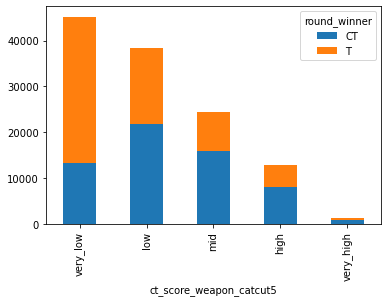

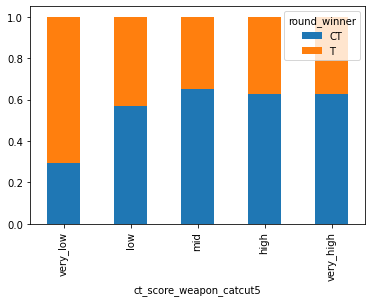

In [475]:
crosstab_01 = pd.crosstab(df_cut["ct_score_weapon_catcut5"], df_cut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

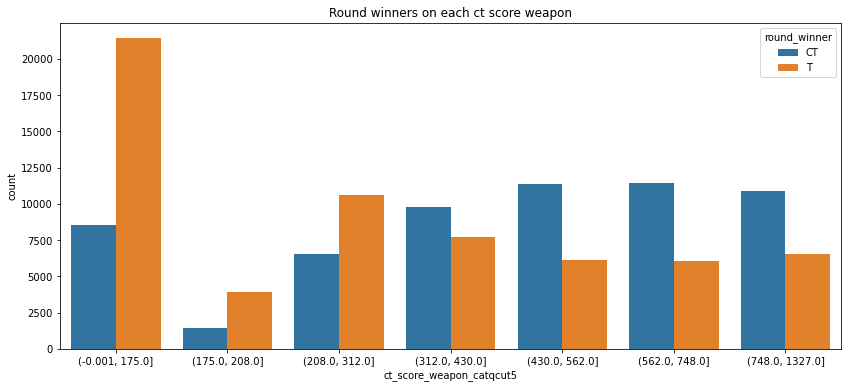

In [476]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="ct_score_weapon_catqcut5", hue="round_winner", data=df_qcut)
ax.set(title='Round winners on each ct score weapon')
plt.show()

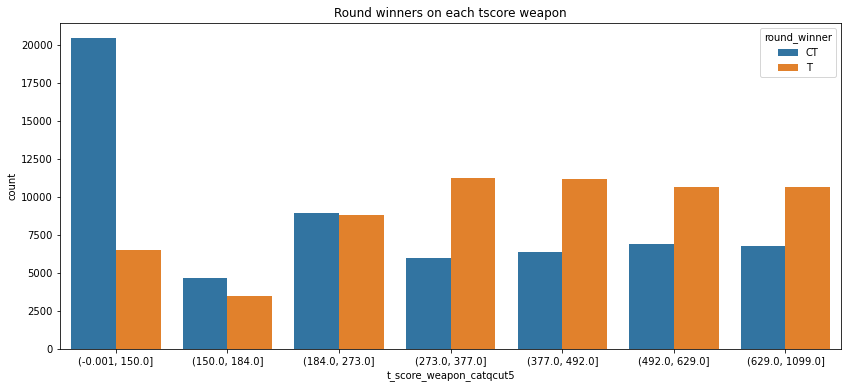

In [477]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="t_score_weapon_catqcut5", hue="round_winner", data=df_qcut)
ax.set(title='Round winners on each tscore weapon')
plt.show()

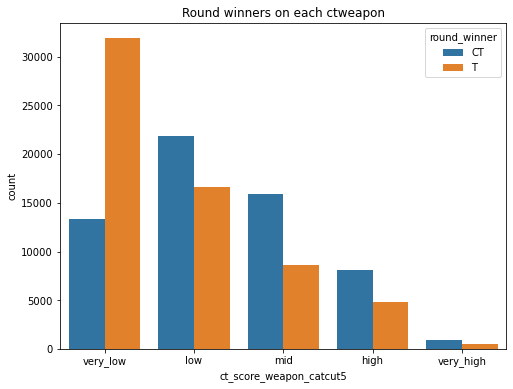

In [478]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_score_weapon_catcut5", hue="round_winner", data=df_cut)
ax.set(title='Round winners on each ctweapon')
plt.show()

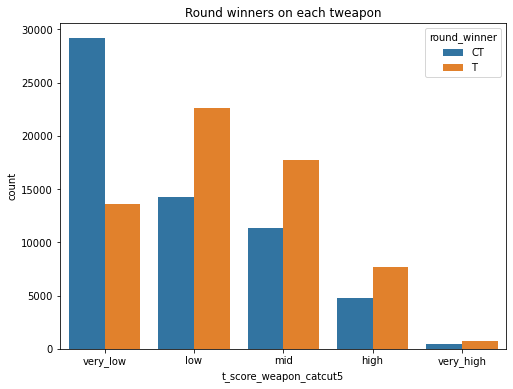

In [479]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="t_score_weapon_catcut5", hue="round_winner", data=df_cut)
ax.set(title='Round winners on each tweapon')
plt.show()

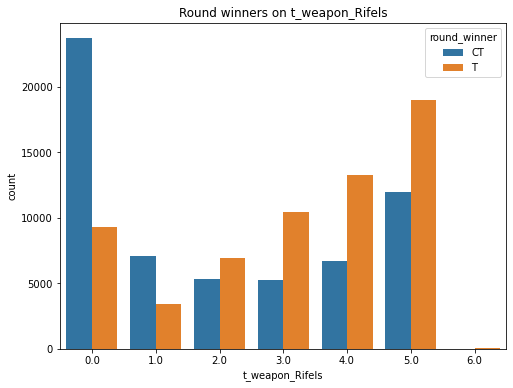

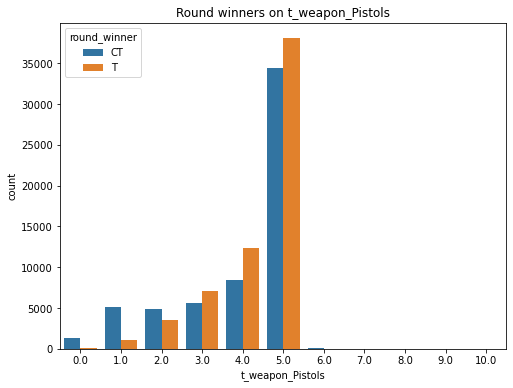

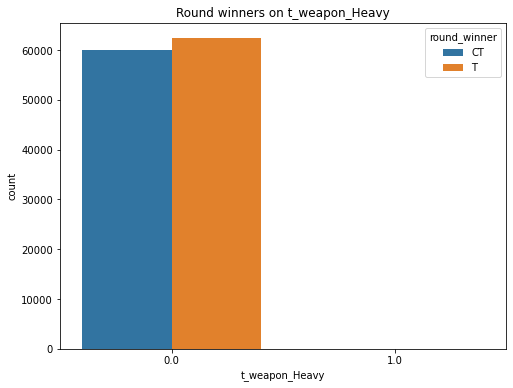

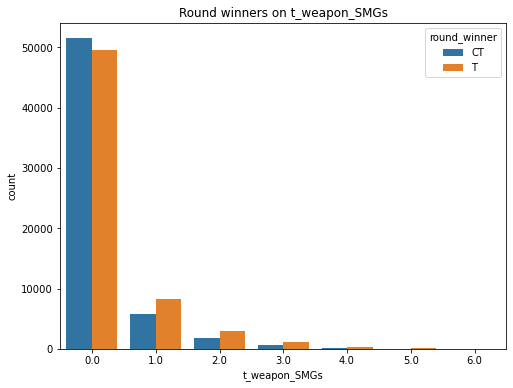

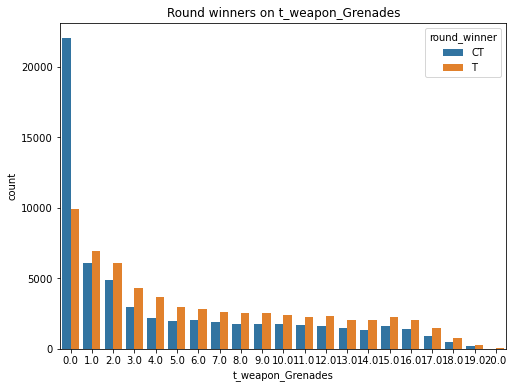

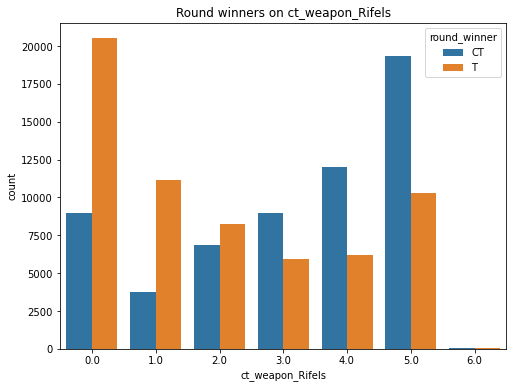

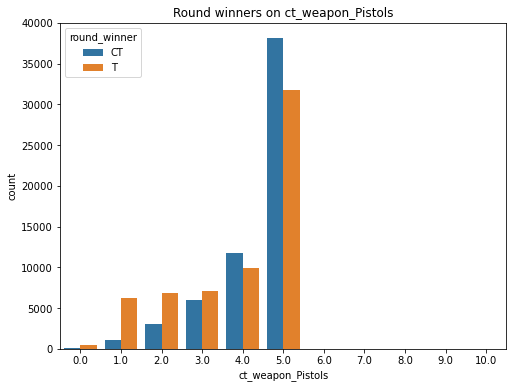

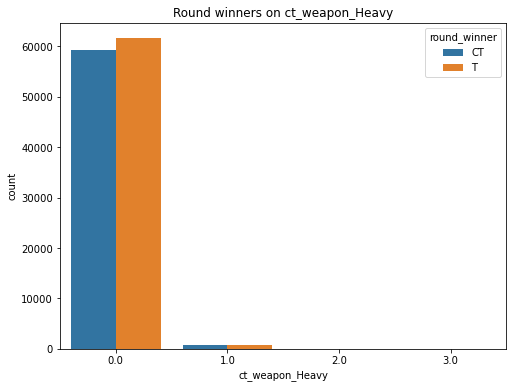

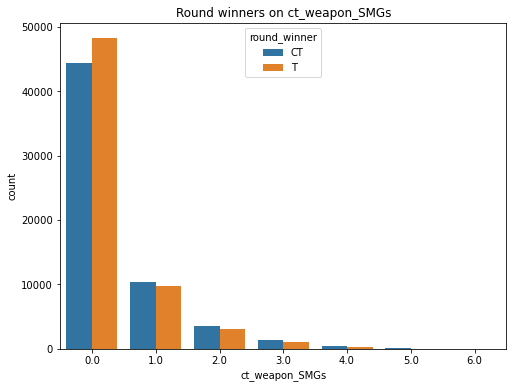

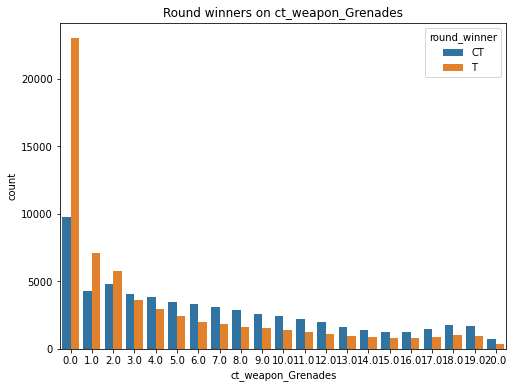

In [480]:
column=['t_weapon_Rifels', 't_weapon_Pistols', 't_weapon_Heavy', 't_weapon_SMGs', 't_weapon_Grenades','ct_weapon_Rifels', 'ct_weapon_Pistols', 'ct_weapon_Heavy', 'ct_weapon_SMGs', 'ct_weapon_Grenades']
for col in column :
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=col, hue="round_winner", data=df)
    ax.set(title='Round winners on '+str(col))
    plt.show()

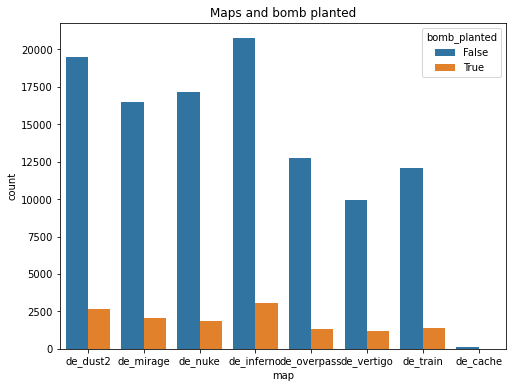

In [481]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df)
ax.set(title='Maps and bomb planted')
plt.show()

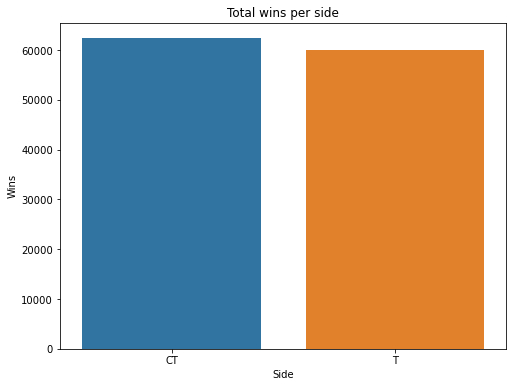

In [482]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['round_winner'].unique(), y=df['round_winner'].value_counts())
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

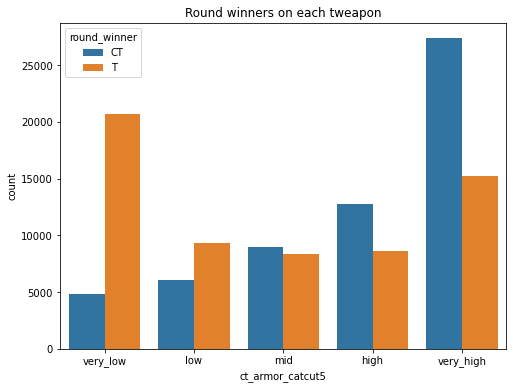

In [483]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="ct_armor_catcut5", hue="round_winner", data=df_cut)
ax.set(title='Round winners on each tweapon')
plt.show()

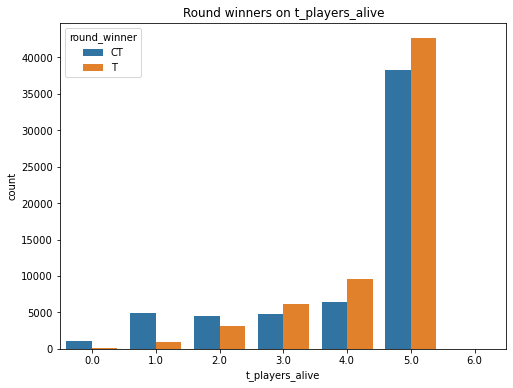

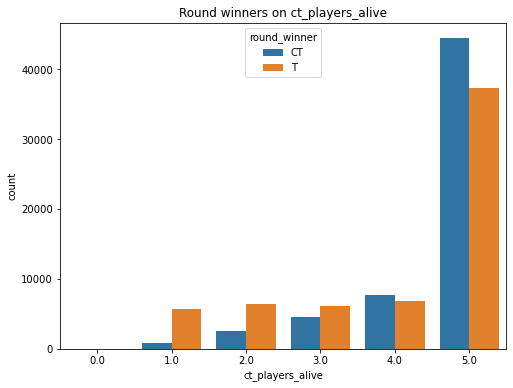

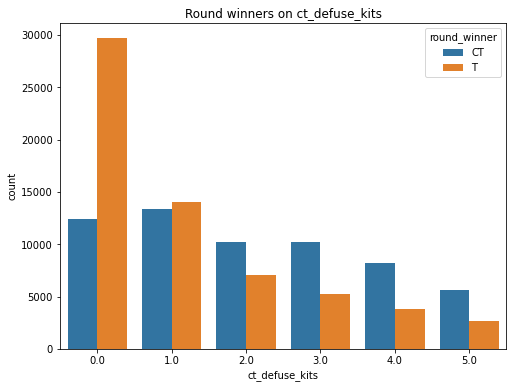

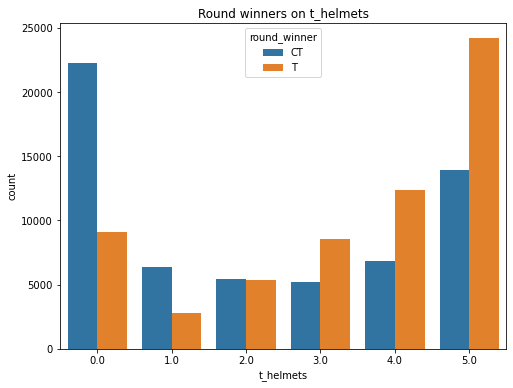

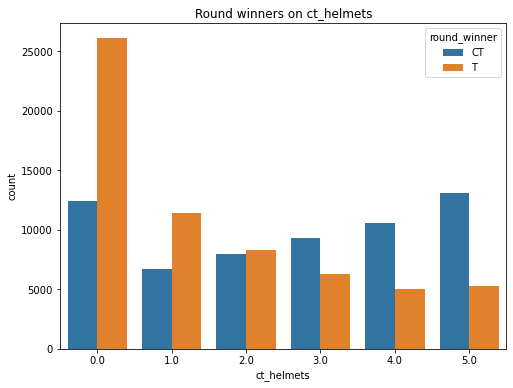

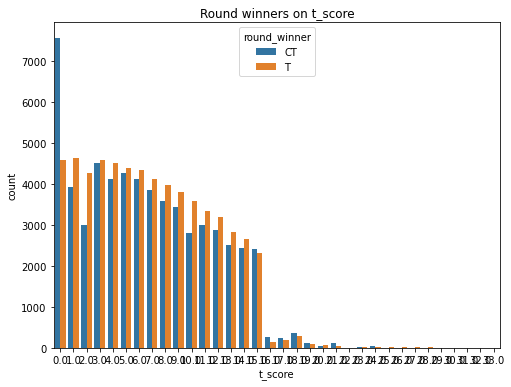

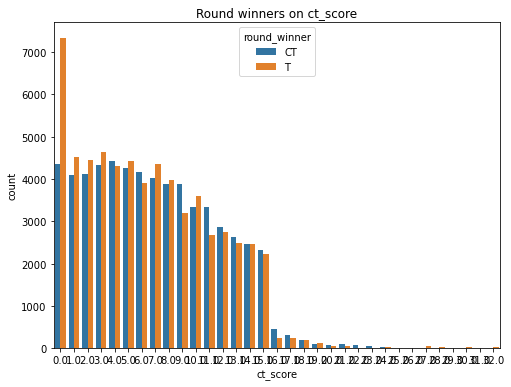

In [484]:
column=["t_players_alive","ct_players_alive","ct_defuse_kits","t_helmets","ct_helmets","t_score","ct_score"]
for col in column :
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=col, hue="round_winner", data=df)
    ax.set(title='Round winners on '+str(col))
    plt.show()  

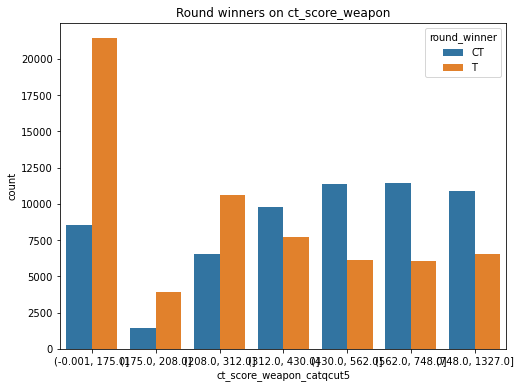

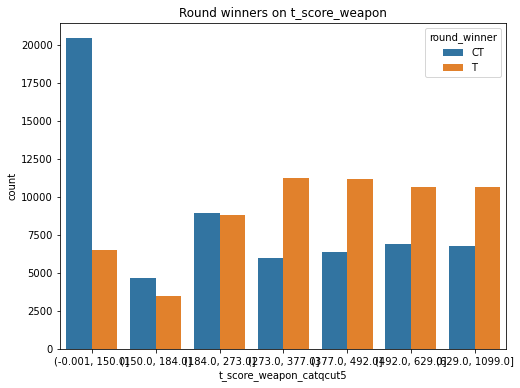

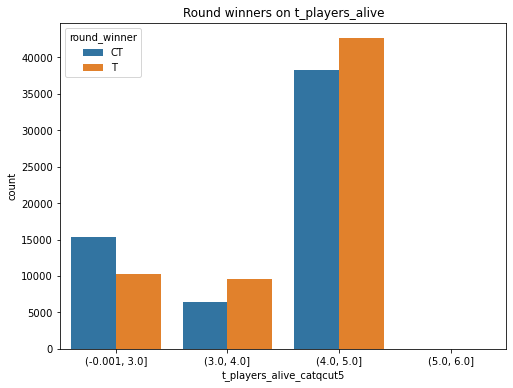

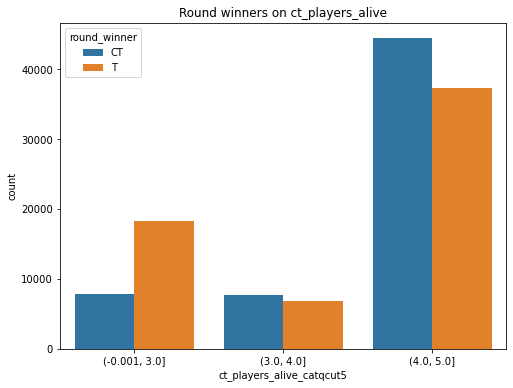

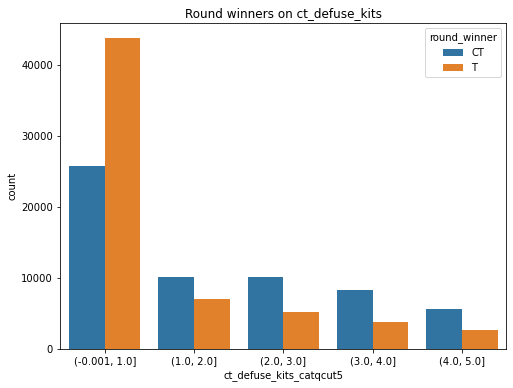

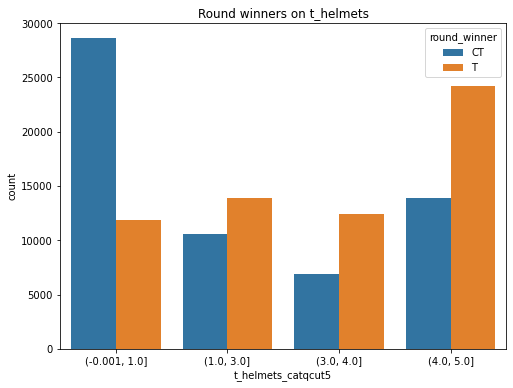

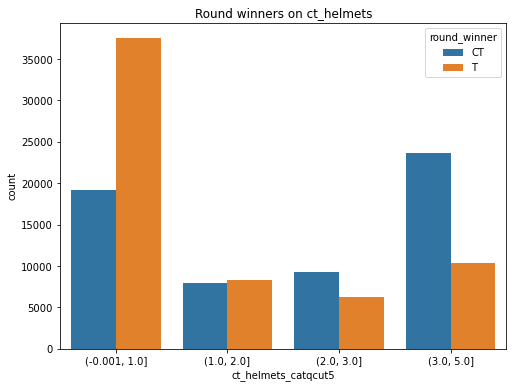

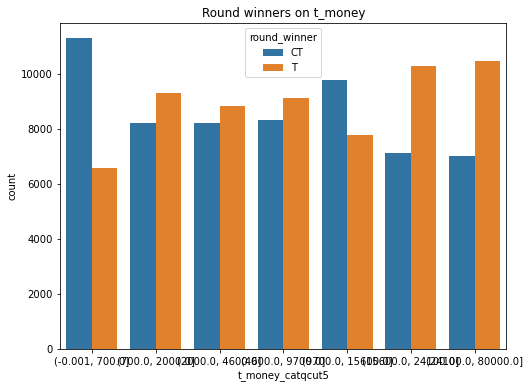

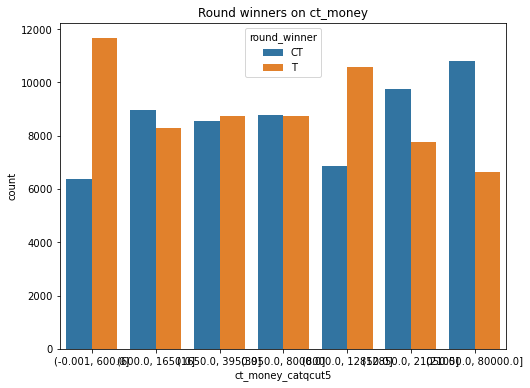

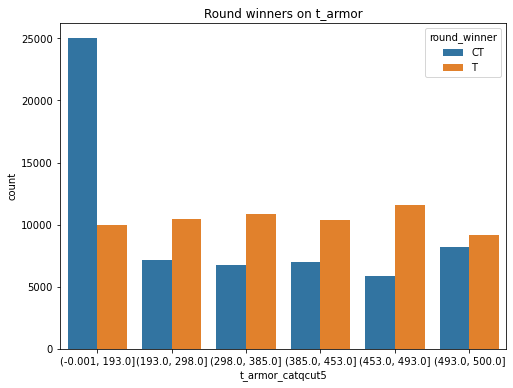

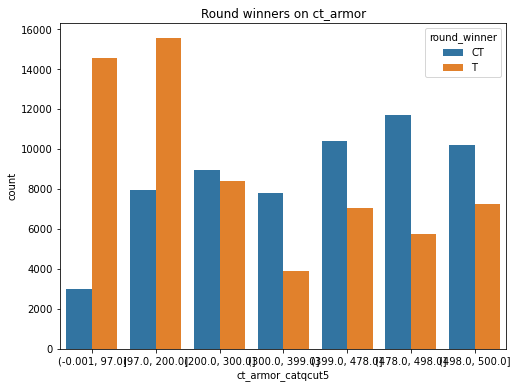

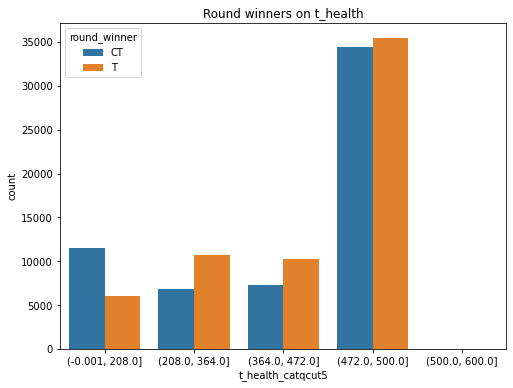

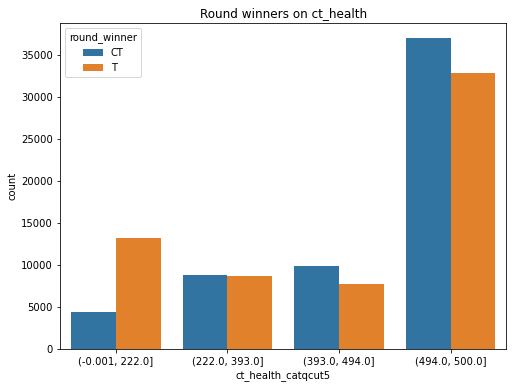

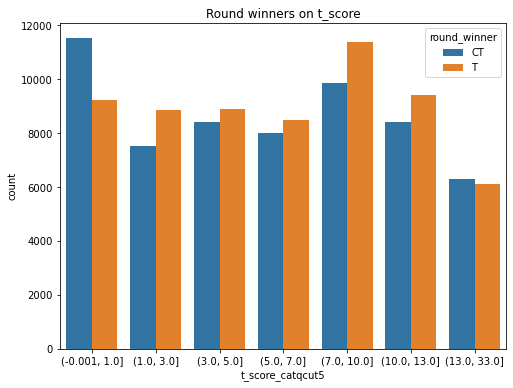

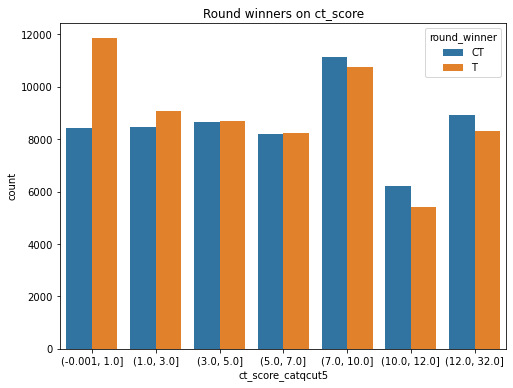

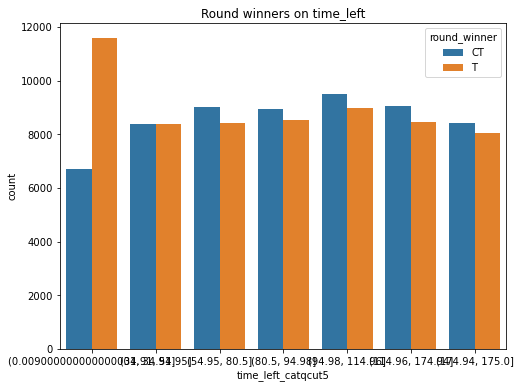

In [485]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","ct_defuse_kits","t_helmets","ct_helmets","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left"]
for col in column :
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=col+"_catqcut5", hue="round_winner", data=df_qcut)
    ax.set(title='Round winners on '+str(col))
    plt.show()

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


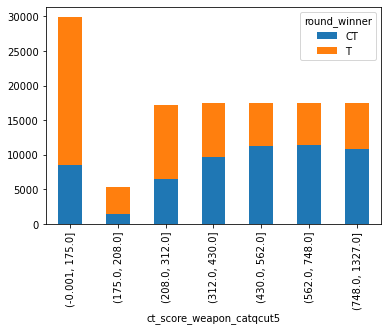

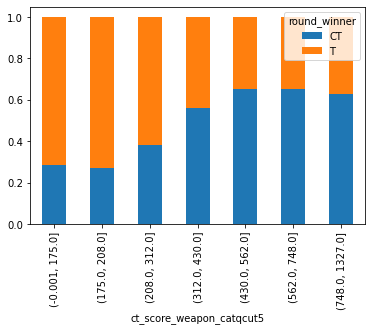

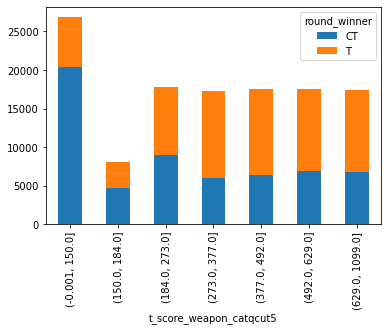

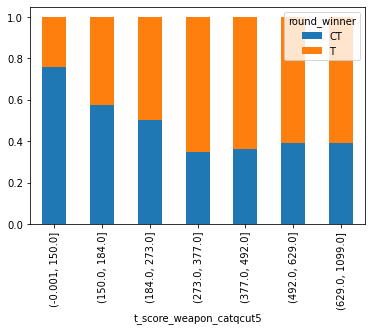

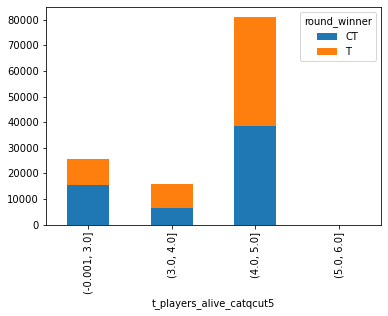

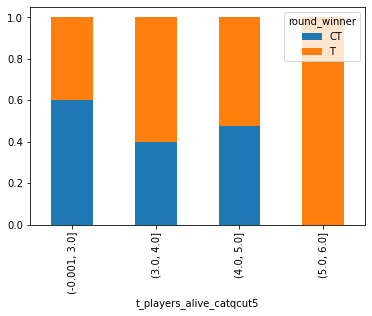

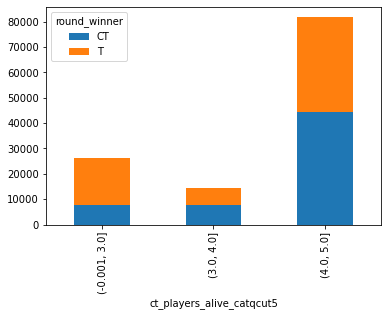

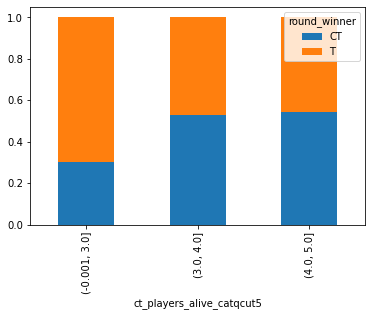

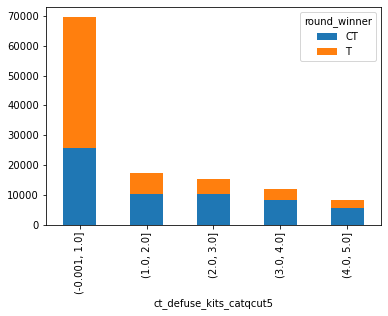

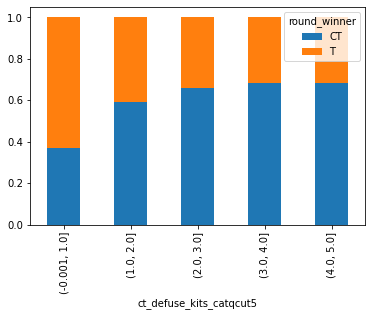

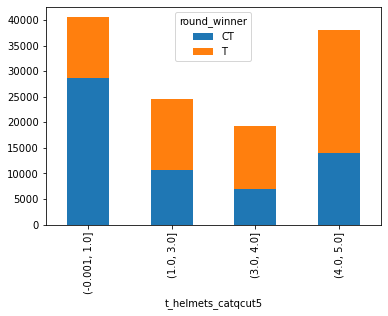

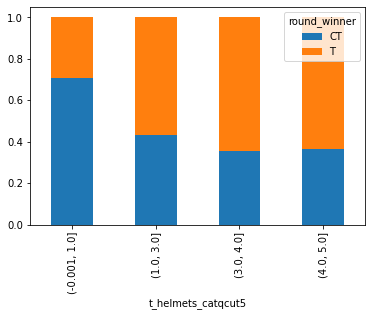

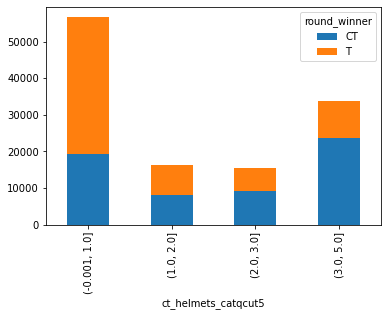

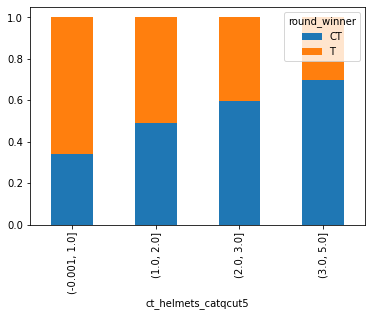

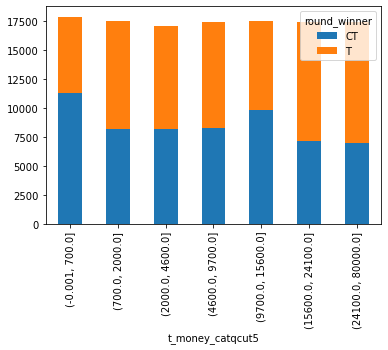

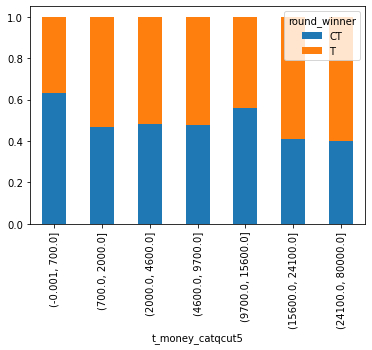

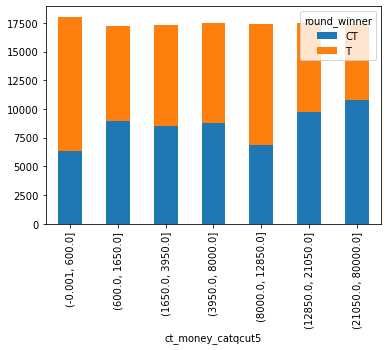

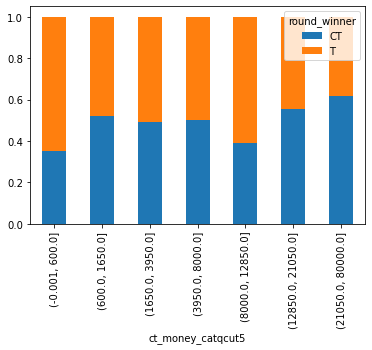

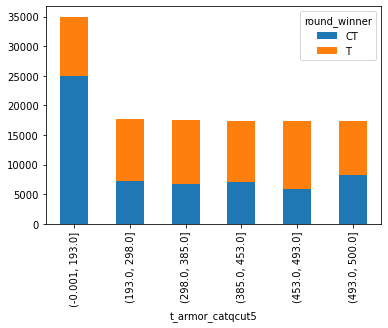

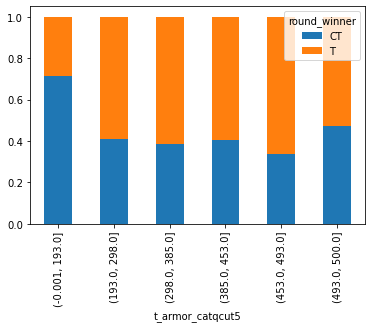

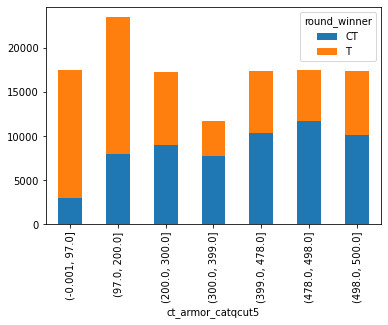

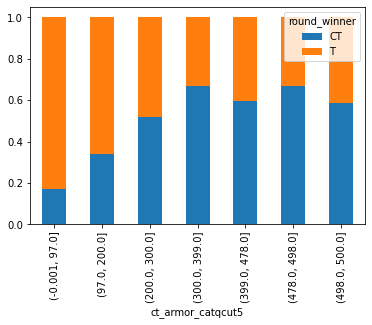

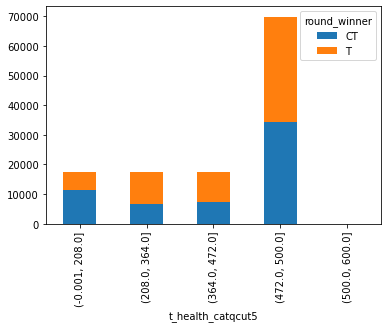

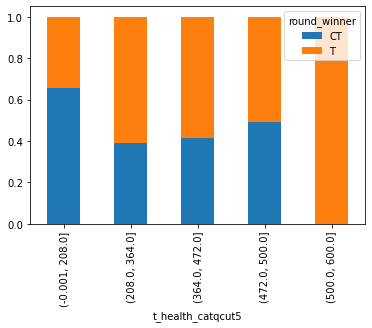

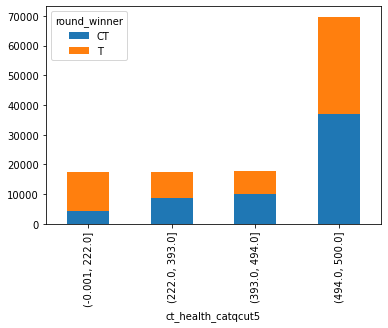

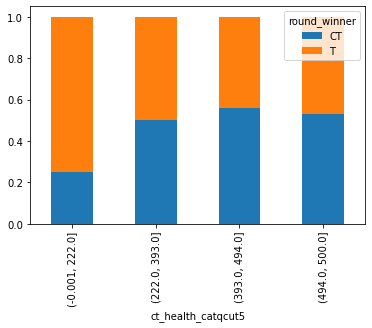

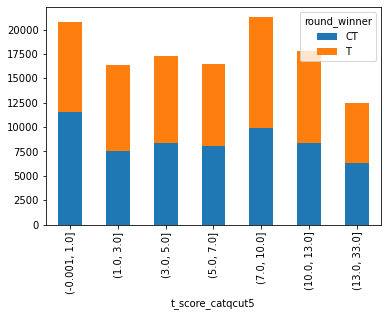

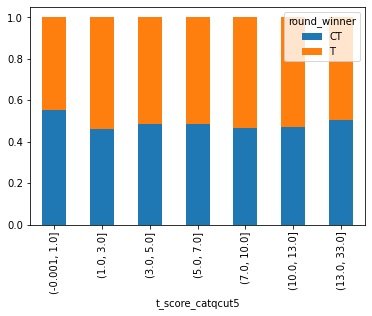

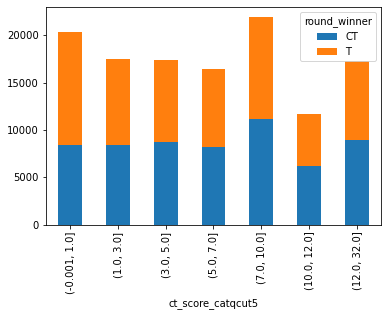

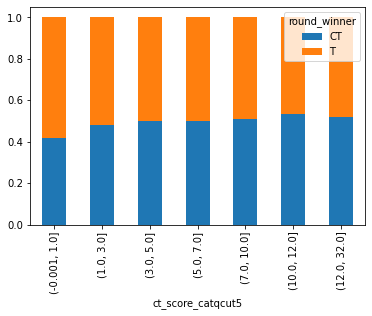

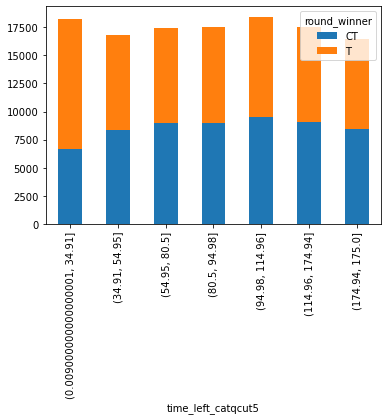

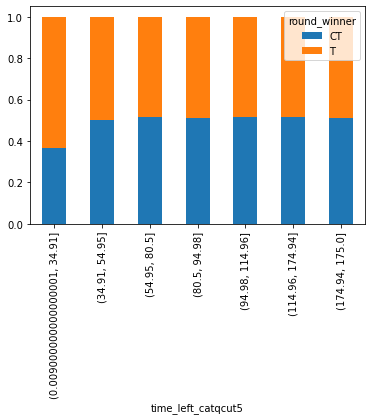

In [486]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","ct_defuse_kits","t_helmets","ct_helmets","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left"]
for col in column :
    crosstab_01 = pd.crosstab(df_qcut[col+"_catqcut5"], df_qcut["round_winner"])
    crosstab_01.plot(kind='bar', stacked = True)
    crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
    crosstab_norm.plot(kind='bar', stacked = True)

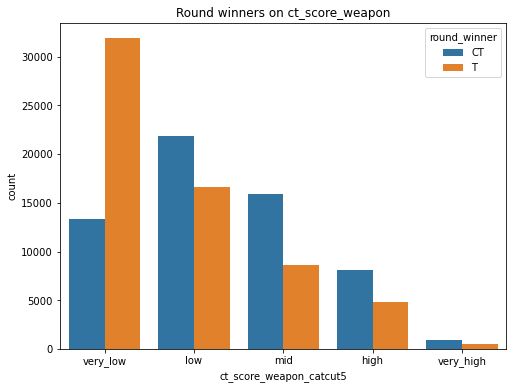

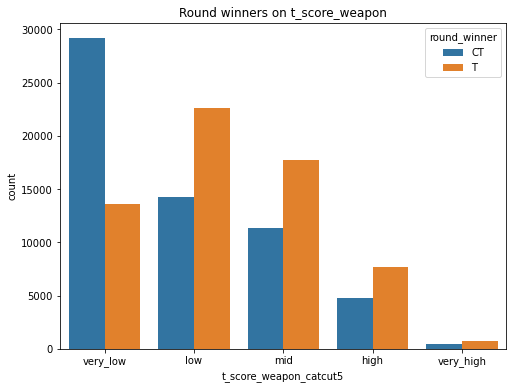

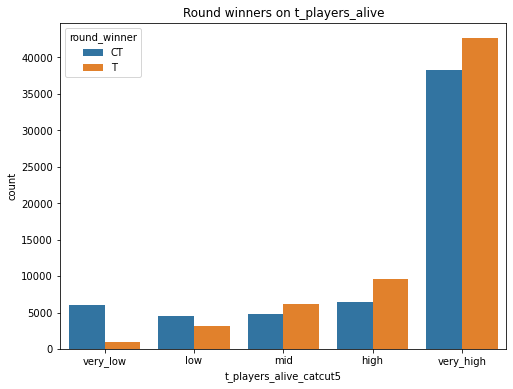

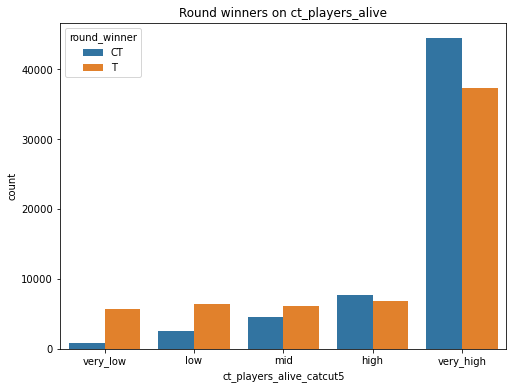

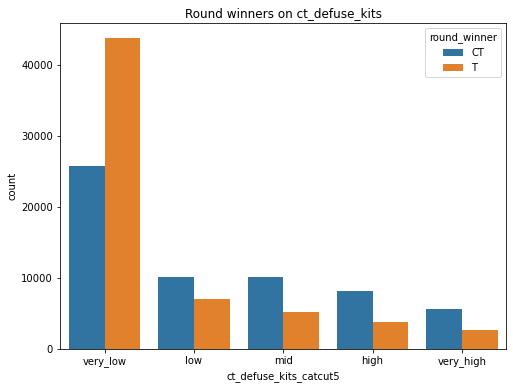

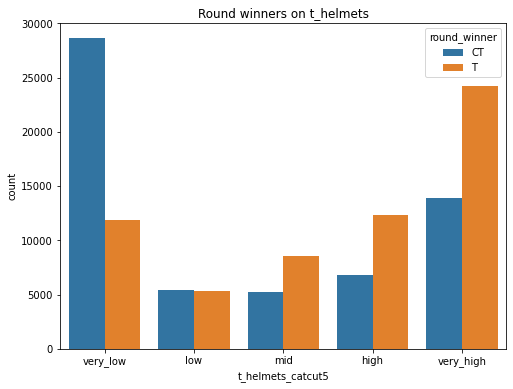

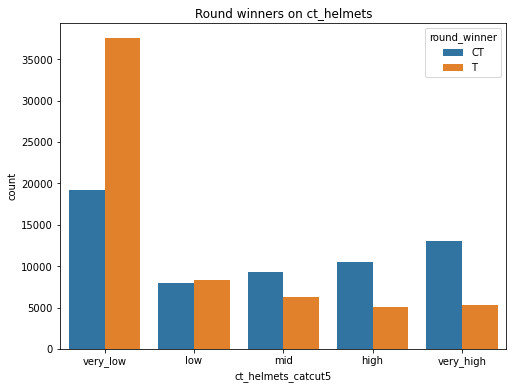

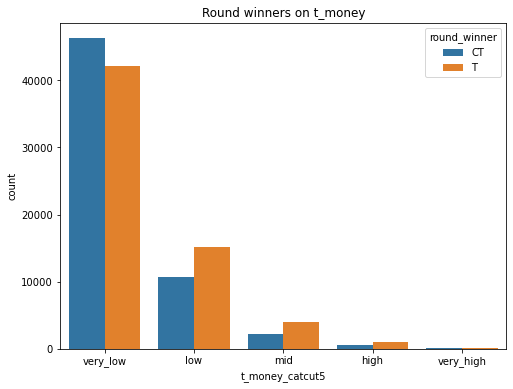

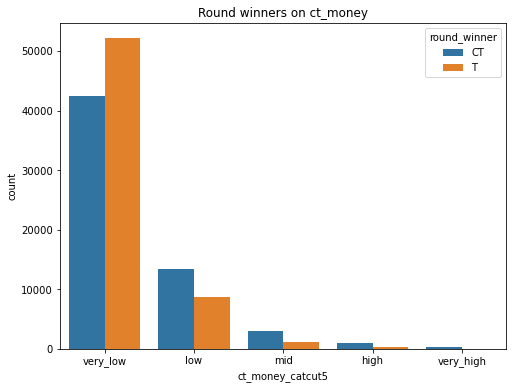

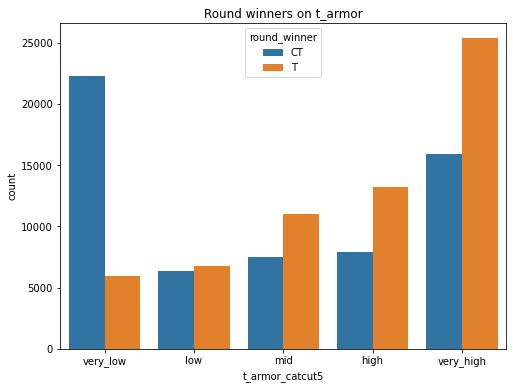

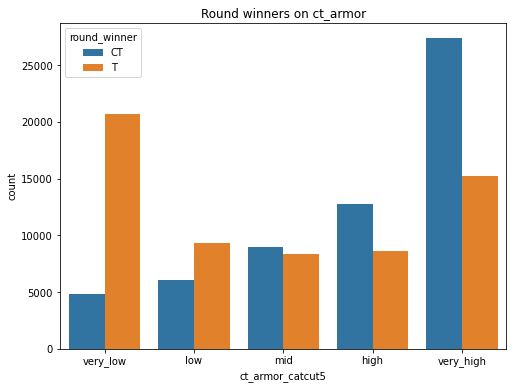

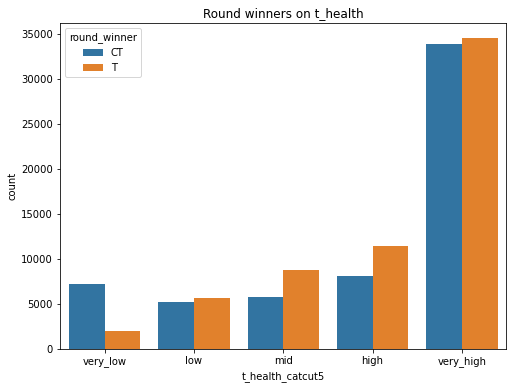

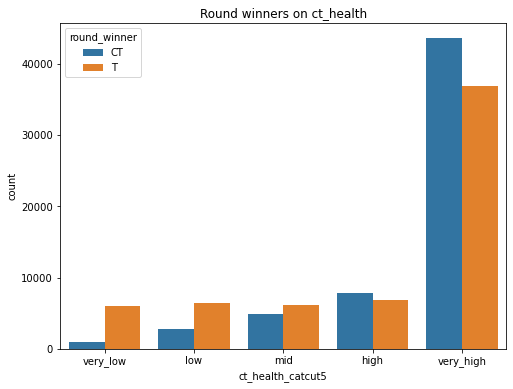

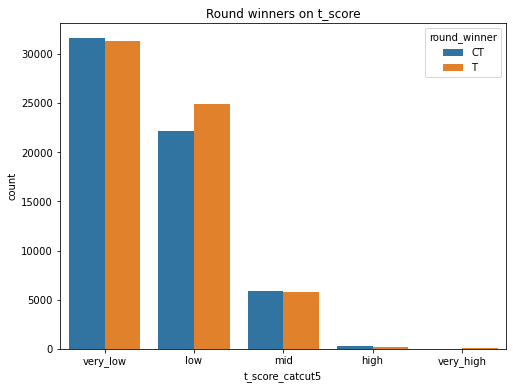

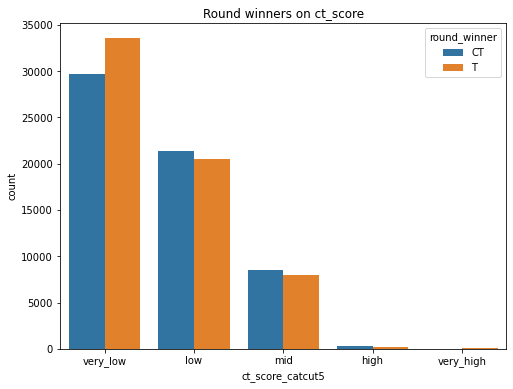

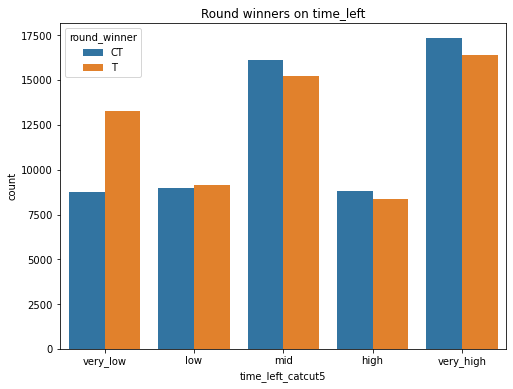

In [487]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","ct_defuse_kits","t_helmets","ct_helmets","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left"]
for col in column :
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=col+"_catcut5", hue="round_winner", data=df_cut)
    ax.set(title='Round winners on '+str(col))
    plt.show()

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


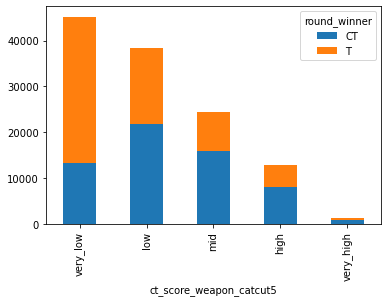

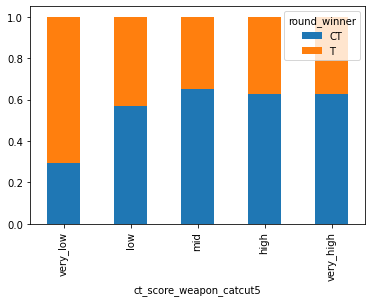

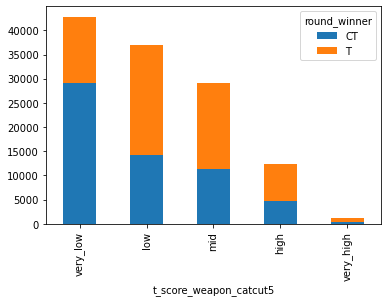

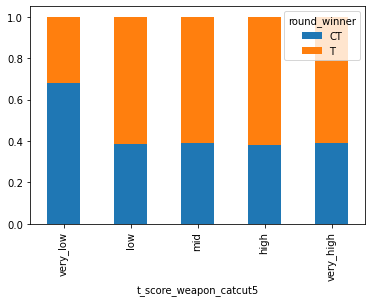

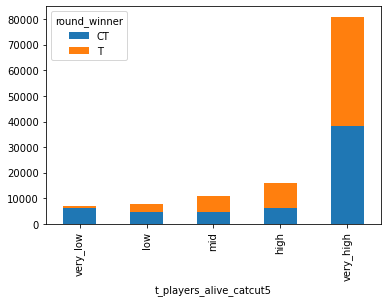

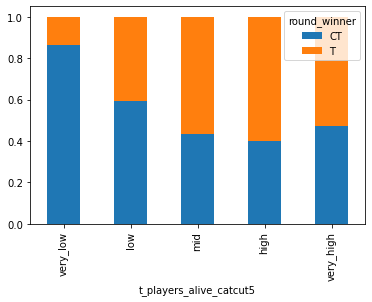

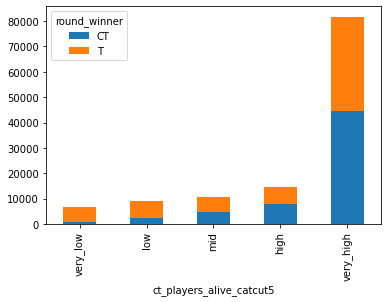

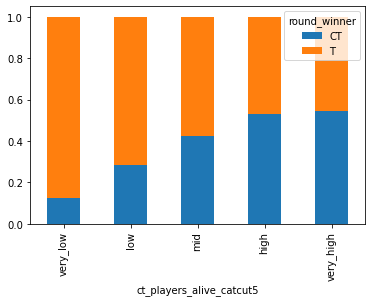

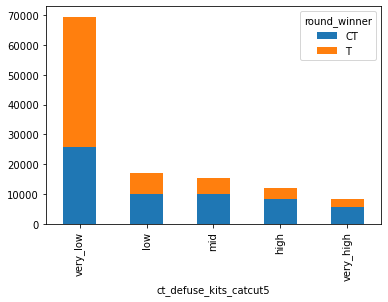

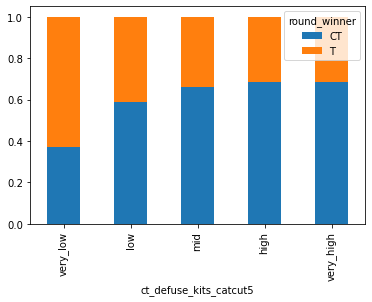

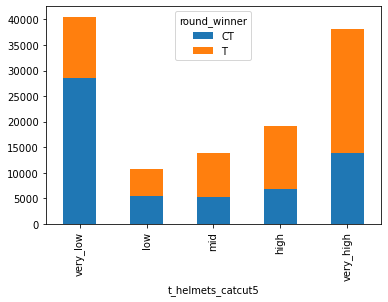

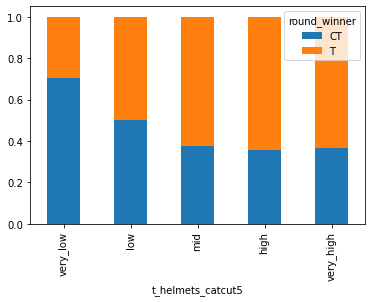

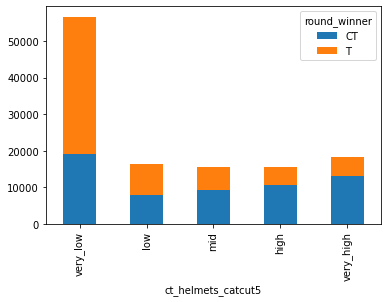

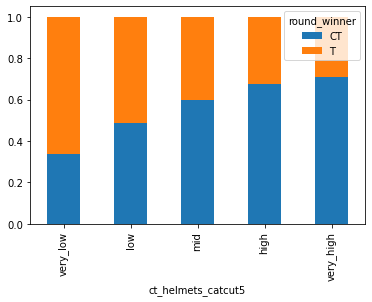

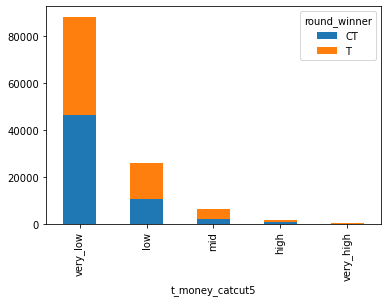

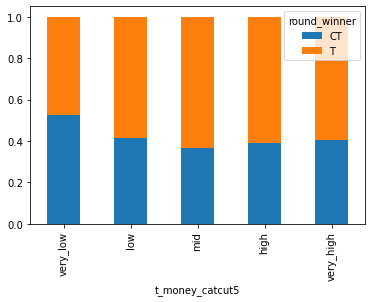

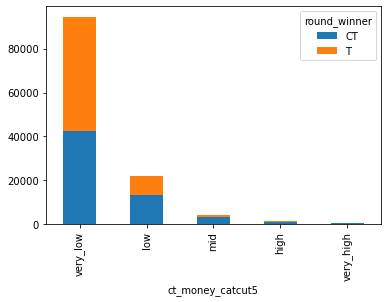

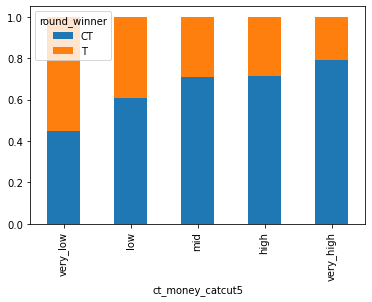

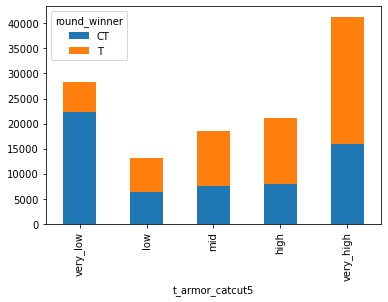

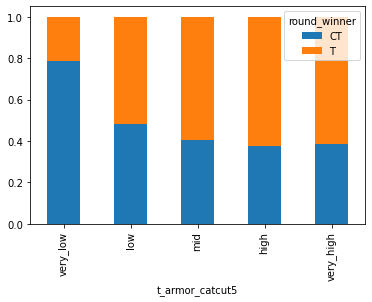

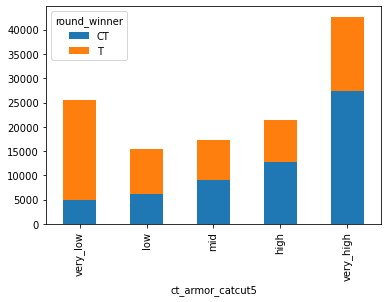

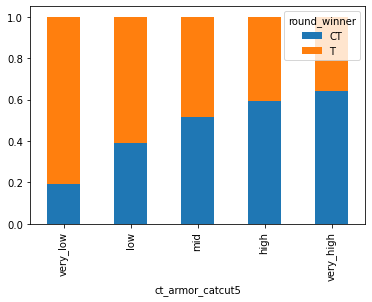

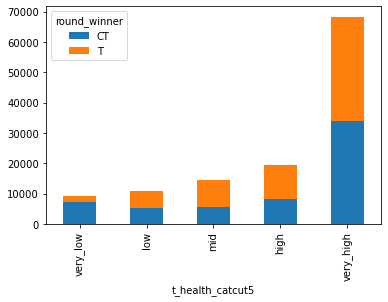

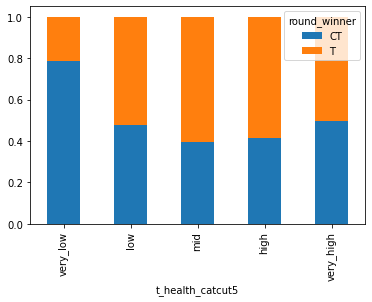

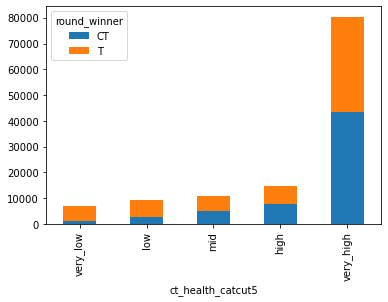

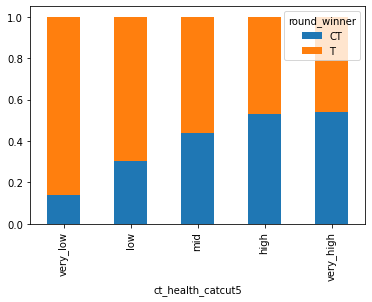

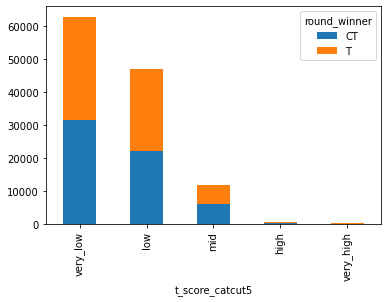

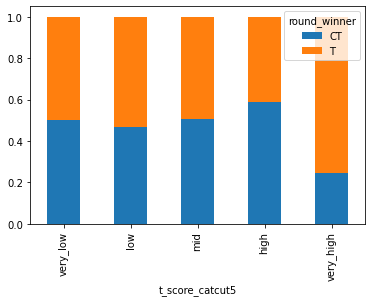

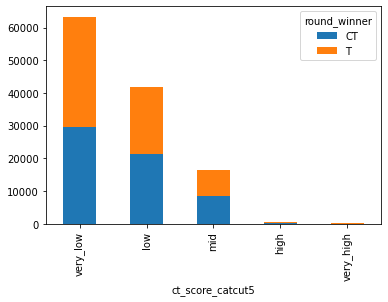

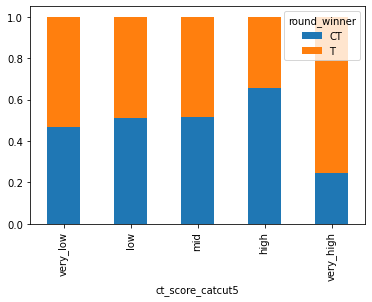

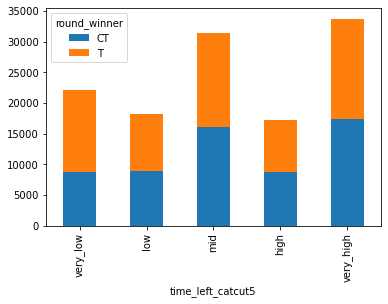

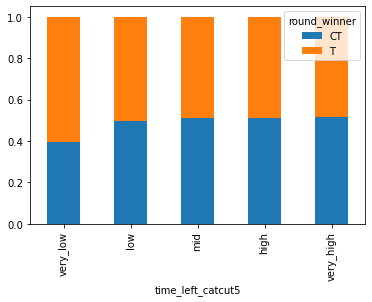

In [488]:
for col in column :
    crosstab_01 = pd.crosstab(df_cut[col+"_catcut5"], df_cut["round_winner"])
    crosstab_01.plot(kind='bar', stacked = True)
    crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
    crosstab_norm.plot(kind='bar', stacked = True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


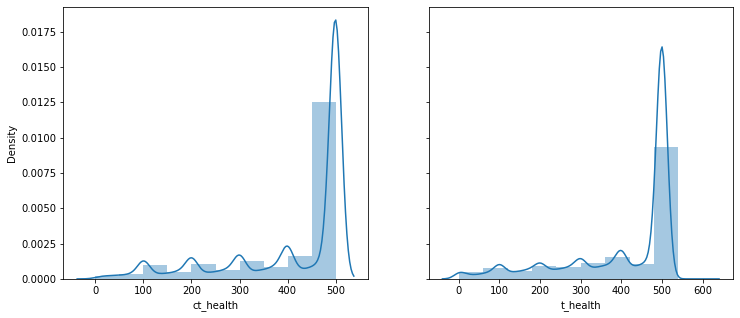

In [489]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_health'], bins=10, ax=ax1);
sns.distplot(df['t_health'], bins=10, ax=ax2);

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


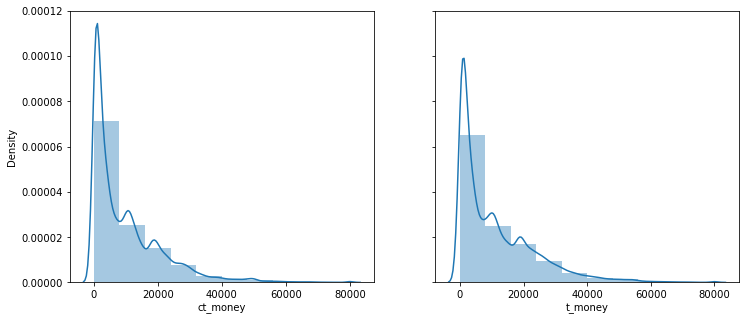

In [490]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_money'], bins=10, ax=ax1);
sns.distplot(df['t_money'], bins=10, ax=ax2);

<AxesSubplot:xlabel='t_score', ylabel='Density'>

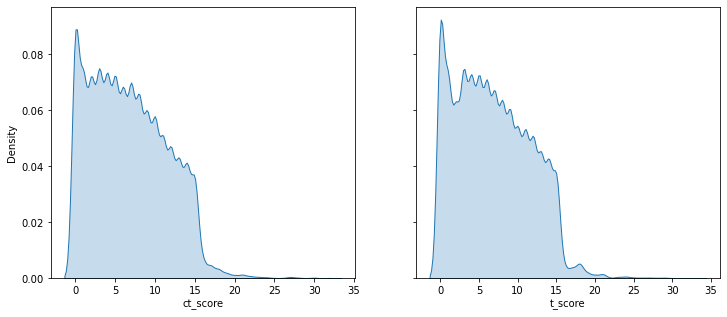

In [491]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.kdeplot(df['ct_score'], shade=True, ax=ax1)
sns.kdeplot(df['t_score'], shade=True, ax=ax2)

<AxesSubplot:xlabel='time_left', ylabel='Density'>

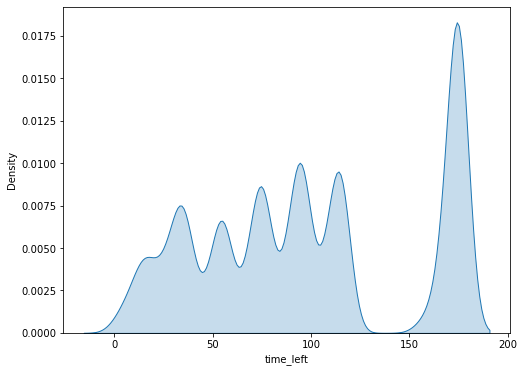

In [492]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['time_left'], shade=True)

In [493]:
column=["ct_score_weapon","t_score_weapon","t_players_alive","ct_players_alive","ct_defuse_kits","t_helmets","ct_helmets","t_money","ct_money","t_armor","ct_armor","t_health","ct_health","t_score","ct_score","time_left","round_winner","bomb_planted"]

In [494]:
data=df[column]
data

ct_score_weapon  t_score_weapon  t_players_alive  ct_players_alive  \
0                 175.0           150.0              5.0               5.0   
1                 175.0           170.0              5.0               5.0   
2                 140.0           140.0              4.0               4.0   
3                 140.0           125.0              4.0               4.0   
4                 175.0           150.0              5.0               5.0   
...                 ...             ...              ...               ...   
122405            139.0           356.0              4.0               2.0   
122406            218.0           295.0              5.0               5.0   
122407            484.0           638.0              5.0               5.0   
122408            414.0           608.0              5.0               5.0   
122409            205.0           558.0              5.0               4.0   

        ct_defuse_kits  t_helmets  ct_helmets  t_money  ct_money  t_armor  \
0                  0.0        0.0         0.0   4000.0    4000.0      0.0   
1                  1.0        0.0         0.0    650.0     600.0    300.0   
2                  1.0        0.0         0.0    500.0     750.0    200.0   
3                  1.0        0.0         0.0    500.0     750.0    200.0   
4                  1.0        0.0         0.0  10750.0   18350.0      0.0   
...                ...        ...         ...      ...       ...      ...   
122405             1.0        4.0         2.0   5950.0     100.0    359.0   
122406             1.0        2.0         1.0  23900.0   11500.0    175.0   
122407             1.0        5.0         3.0   6700.0    1200.0    475.0   
122408             1.0        5.0         3.0   6700.0    1200.0    475.0   
122409             1.0        5.0         2.0   7000.0    1100.0    466.0   

        ct_armor  t_health  ct_health  t_score  ct_score  time_left  \
0            0.0     500.0      500.0      0.0       0.0     175.00   
1          400.0     500.0      500.0      0.0       0.0     156.03   
2          294.0     400.0      391.0      0.0       0.0      96.03   
3          294.0     400.0      391.0      0.0       0.0      76.03   
4          192.0     500.0      500.0      0.0       1.0     174.97   
...          ...       ...        ...      ...       ...        ...   
122405     195.0     242.0      200.0     14.0      11.0      15.41   
122406      95.0     500.0      500.0     15.0      11.0     174.93   
122407     495.0     500.0      500.0     15.0      11.0     114.93   
122408     495.0     500.0      500.0     15.0      11.0      94.93   
122409     395.0     479.0      375.0     15.0      11.0      74.93   

       round_winner  bomb_planted  
0                CT         False  
1                CT         False  
2                CT         False  
3                CT         False  
4                CT         False  
...             ...           ...  
122405            T          True  
122406            T         False  
122407            T         False  
122408            T         False  
122409            T         False  

[122410 rows x 18 columns]

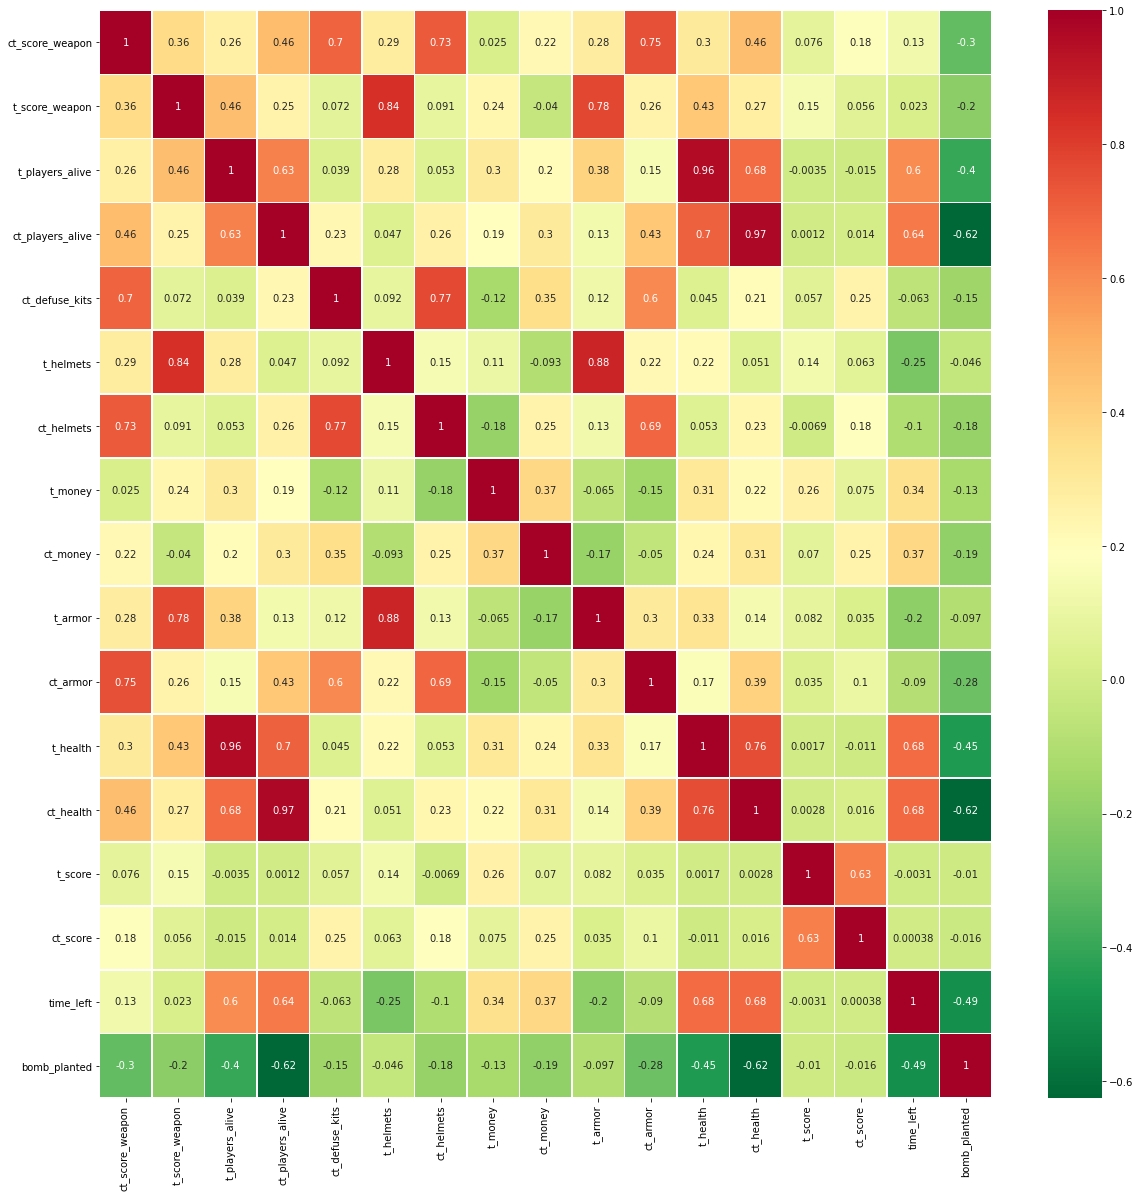

In [495]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(data.corr(), cmap='RdYlGn_r', linewidths=.5, annot=True)

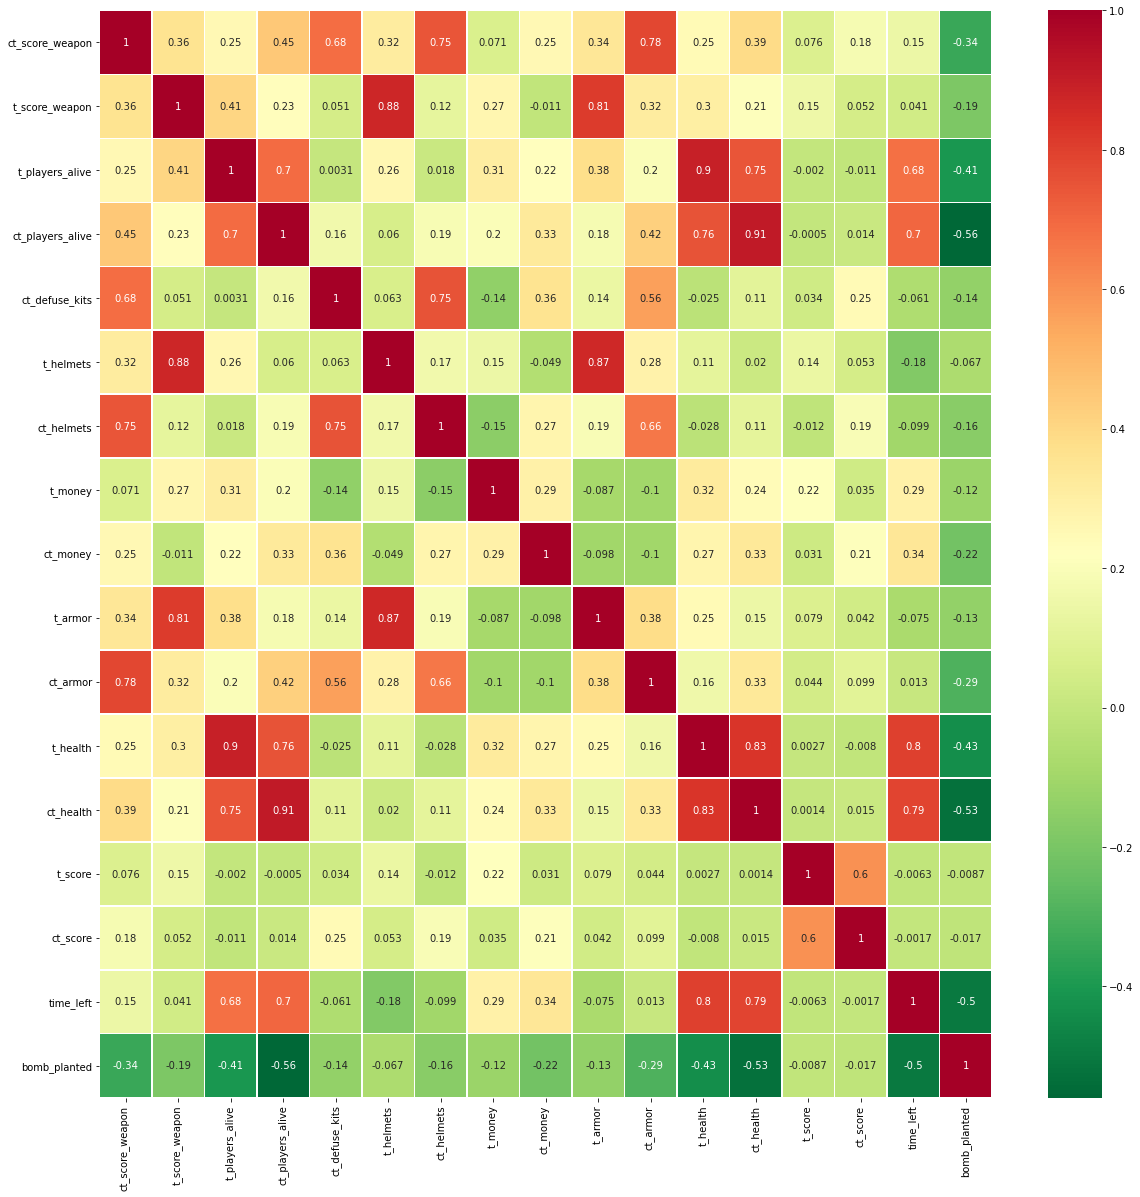

In [496]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(data.corr("spearman"), cmap='RdYlGn_r', linewidths=.5, annot=True)

In [497]:
# # generate related variables
# from numpy import mean
# from numpy import std
# from numpy.random import randn
# from numpy.random import seed
# from matplotlib import pyplot
# # seed random number generator
# seed(1)
# # prepare data
# data1 = df
# data2 = 
# # summarize
# print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
# print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# # plot
# pyplot.scatter(data1, data2)
# pyplot.show()

## sabad bandy bar mabnay meghdar pishbini

<AxesSubplot:xlabel='ct_score_weapon', ylabel='t_score_weapon'>

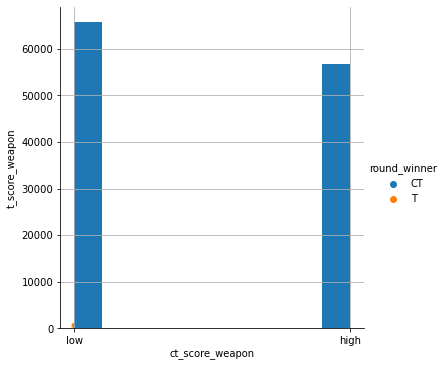

In [498]:
sns.relplot(x ="ct_score_weapon", y ="t_score_weapon", hue ="round_winner", data =df);
weapscore_labels_4 = ['low','high']
cut_bins = [0, 400,1500]
df_cat = pd.DataFrame()
df_cat = df_cat.join(y)
df_cat["ct_score_weapon_cat"] = pd.cut(df['ct_score_weapon'], bins=cut_bins, labels=weapscore_labels_4)
df_cat["ct_score_weapon_cat"].hist()

<AxesSubplot:xlabel='ct_score_weapon_cat'>

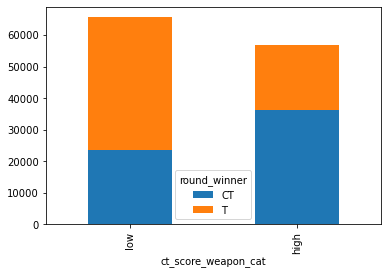

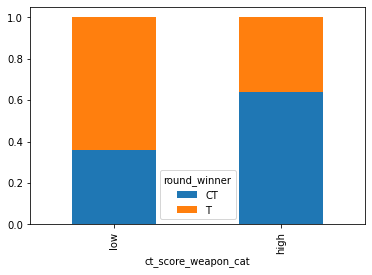

In [499]:
crosstab_01 = pd.crosstab(df_cat["ct_score_weapon_cat"], df["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:>

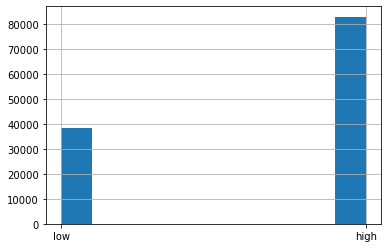

In [500]:
cut_bins = [0,200, 1500]
df_cat["t_score_weapon_cat"] = pd.cut(df['t_score_weapon'], bins=cut_bins, labels=weapscore_labels_4)
df_cat['t_score_weapon_cat'].hist()

<AxesSubplot:xlabel='t_score_weapon_cat'>

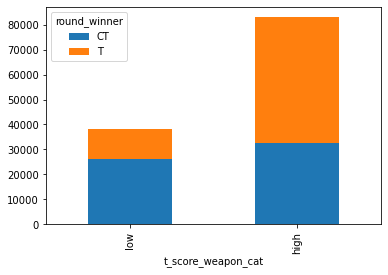

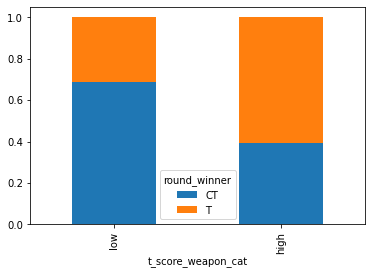

In [501]:
crosstab_01 = pd.crosstab(df_cat["t_score_weapon_cat"], df["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

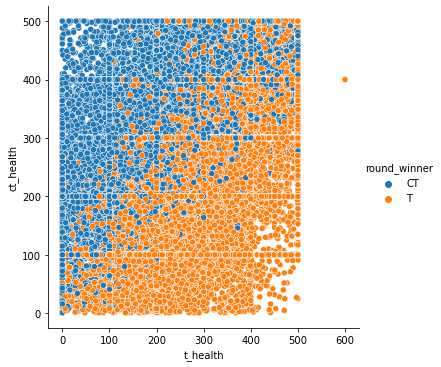

In [502]:
sns.relplot(x ="t_health", y ="ct_health", 
            hue ="round_winner", data =df);

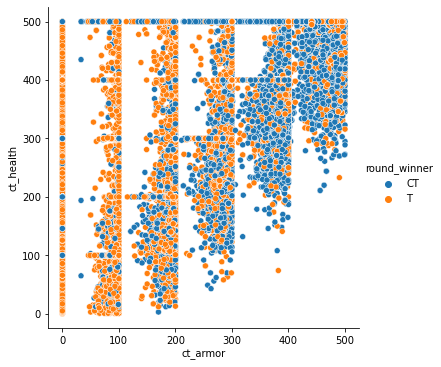

In [503]:
sns.relplot(x ="ct_armor", y ="ct_health",  hue ="round_winner", data =df);

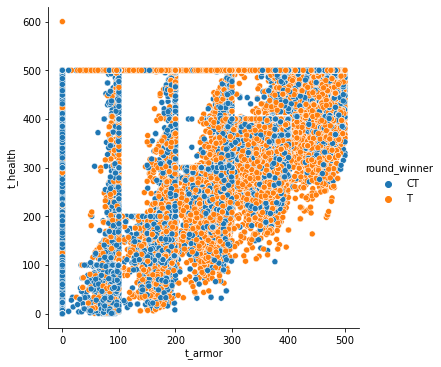

In [504]:
sns.relplot(x ="t_armor", y ="t_health", hue ="round_winner", data =df);

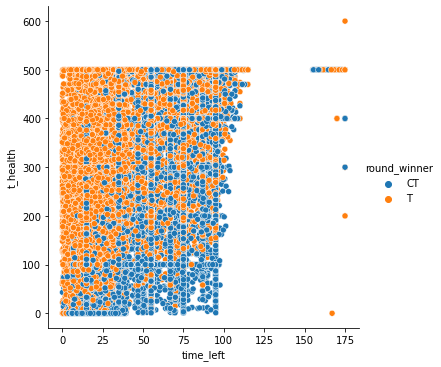

In [505]:
sns.relplot(x ="time_left", y ="t_health", hue ="round_winner", data =df);

## create new var base on other

<AxesSubplot:xlabel='time_left_catqcut5'>

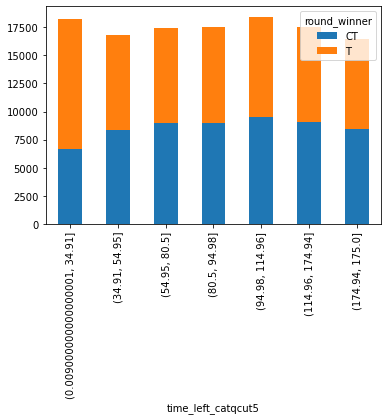

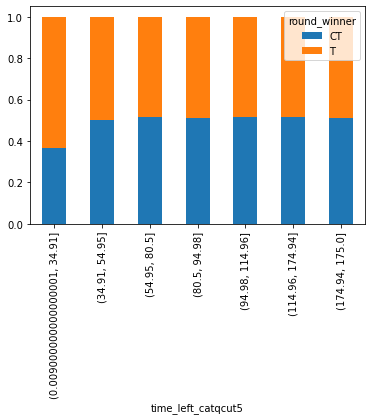

In [506]:
crosstab_01 = pd.crosstab(df_qcut["time_left_catqcut5"], df_qcut["round_winner"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [531]:
df_concat = pd.DataFrame()
df_concat["tarm_heal"]=df["t_armor"]+df["t_health"]
df_concat["ctarm_heal"]=df["ct_armor"]+df["ct_health"]

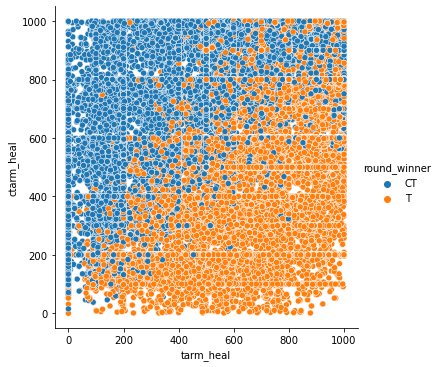

In [532]:
sns.relplot(x ="tarm_heal", y ="ctarm_heal", hue ="round_winner", data =df);

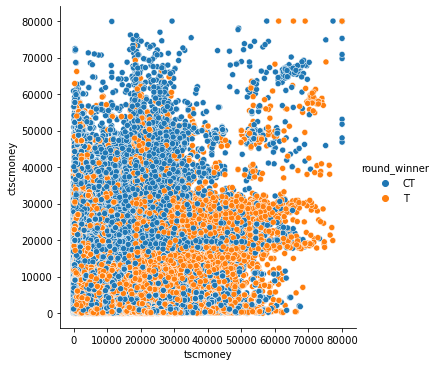

In [533]:
df_concat["tscmoney"]=df["t_score"]+df["t_money"]
df_concat["ctscmoney"]=df["ct_score"]+df["ct_money"]
sns.relplot(x ="tscmoney", y ="ctscmoney", hue ="round_winner", data =df);

In [534]:
df_concat.to_csv("concat_attribute.csv")

<Figure size 576x432 with 0 Axes>

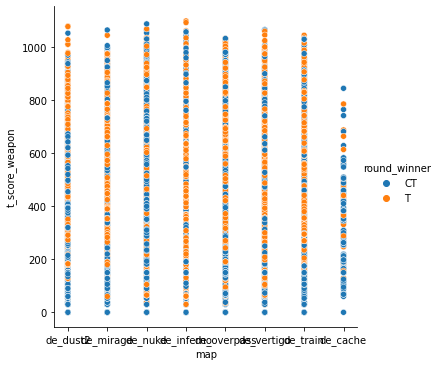

<Figure size 576x432 with 0 Axes>

In [535]:
sns.relplot(x ="map", y ="t_score_weapon", hue ="round_winner", data =df);
plt.figure(figsize=(8,6))

In [536]:
columns=['t_weapon_Rifels', 't_weapon_Pistols', 't_weapon_Heavy', 't_weapon_SMGs', 't_weapon_Grenades',
                          'ct_weapon_Rifels', 'ct_weapon_Pistols', 'ct_weapon_Heavy', 'ct_weapon_SMGs', 'ct_weapon_Grenades']

In [537]:
df

time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0          500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
1          500.0     400.0    300.0     600.0    650.0         0.0        0.0   
2          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
3          400.0     294.0    200.0     750.0    500.0         0.0        0.0   
4          500.0     192.0      0.0   18350.0  10750.0         0.0        0.0   
...          ...       ...      ...       ...      ...         ...        ...   
122405     242.0     195.0    359.0     100.0   5950.0         2.0        4.0   
122406     500.0      95.0    175.0   11500.0  23900.0         1.0        2.0   
122407     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122408     500.0     495.0    475.0    1200.0   6700.0         3.0        5.0   
122409     479.0     395.0    466.0    1100.0   7000.0         2.0        5.0   

        ct_defuse_kits  ct_players_alive  t_players_alive round_winner  \
0                  0.0               5.0              5.0           CT   
1                  1.0               5.0              5.0           CT   
2                  1.0               4.0              4.0           CT   
3                  1.0               4.0              4.0           CT   
4                  1.0               5.0              5.0           CT   
...                ...               ...              ...          ...   
122405             1.0               2.0              4.0            T   
122406             1.0               5.0              5.0            T   
122407             1.0               5.0              5.0            T   
122408             1.0               5.0              5.0            T   
122409             1.0               4.0              5.0            T   

        ct_score_weapon  t_score_weapon  norm_t_health  t_weapon_Rifels  \
0                 175.0           150.0       0.003352              0.0   
1                 175.0           170.0       0.003352              0.0   
2                 140.0           140.0       0.002682              0.0   
3                 140.0           125.0       0.002682              0.0   
4                 175.0           150.0       0.003352              0.0   
...                 ...             ...            ...              ...   
122405            139.0           356.0       0.001622              4.0   
122406            218.0           295.0       0.003352              2.0   
122407            484.0           638.0       0.003352              4.0   
122408            414.0           608.0       0.003352              5.0   
122409            205.0           558.0       0.003211              5.0   

        t_weapon_Pistols  t_weapon_Heavy  t_weapon_SMGs  t_weapon_Grenades  \
0                    5.0             0.0            0.0                0.0   
1                    5.0             0.0            0.0                2.0   
2                    4.0             0.0            0.0                2.0   
3                    4.0        

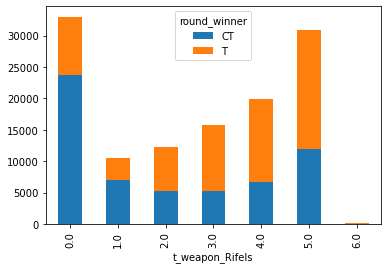

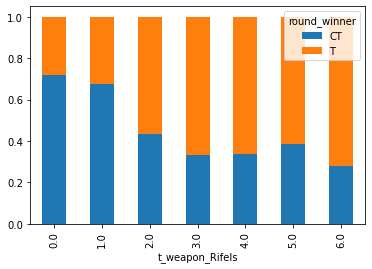

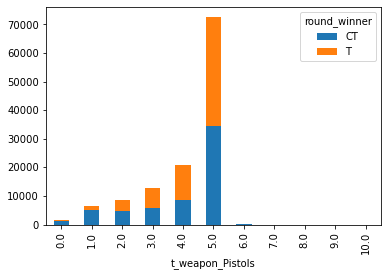

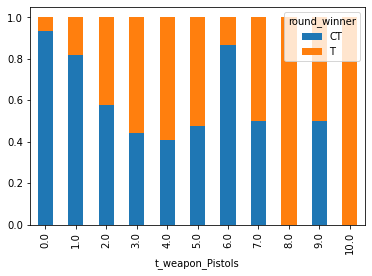

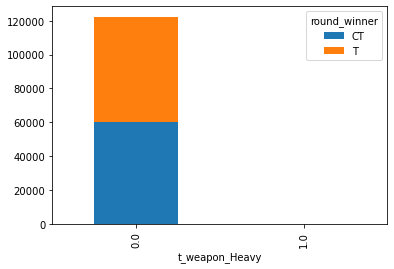

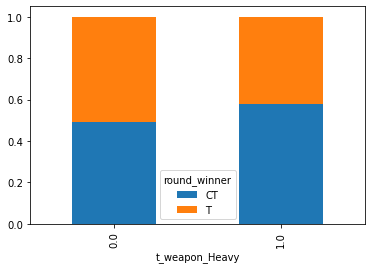

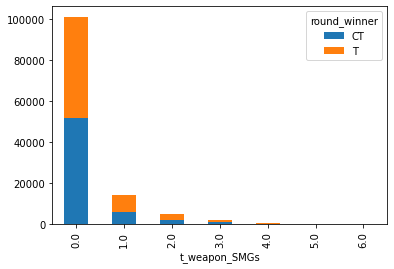

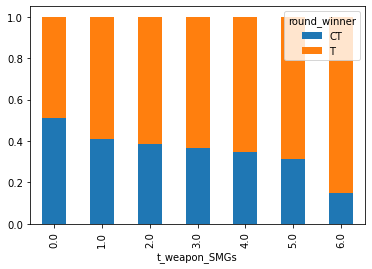

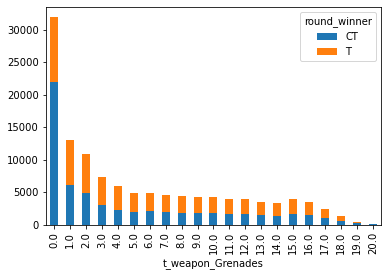

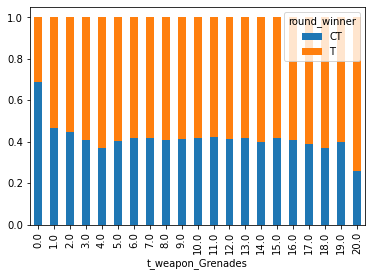

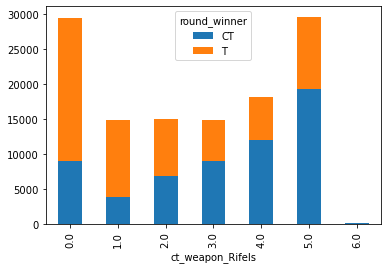

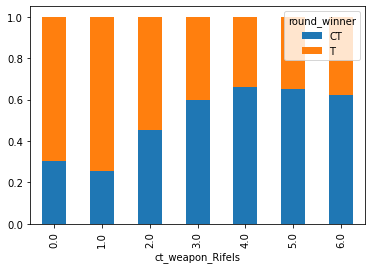

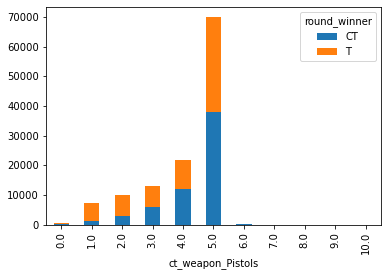

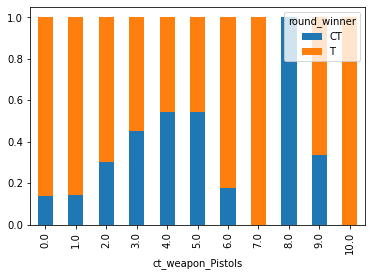

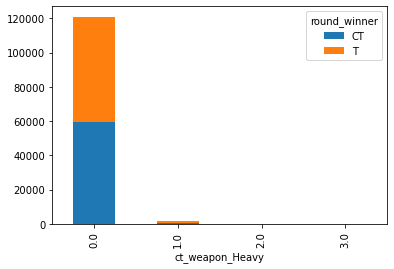

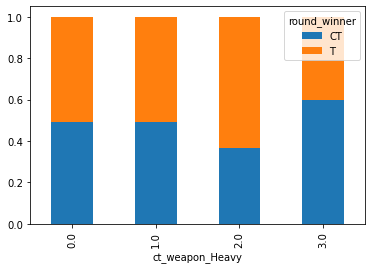

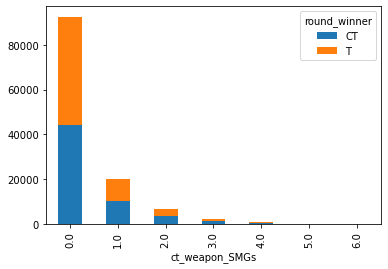

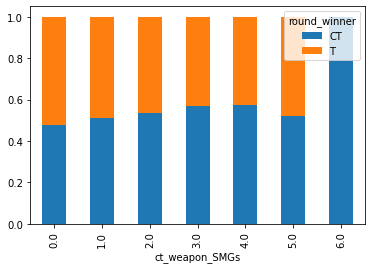

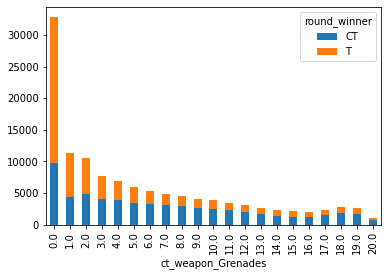

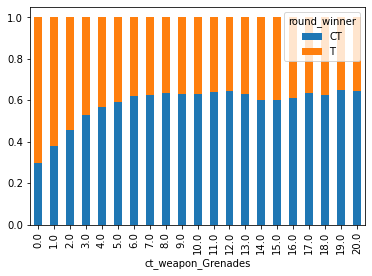

In [538]:
pt=df[columns]
for i in pt:
    crosstab_01 = pd.crosstab(df[i], df["round_winner"])
    crosstab_01.plot(kind='bar', stacked = True)
    crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
    crosstab_norm.plot(kind='bar', stacked = True)  

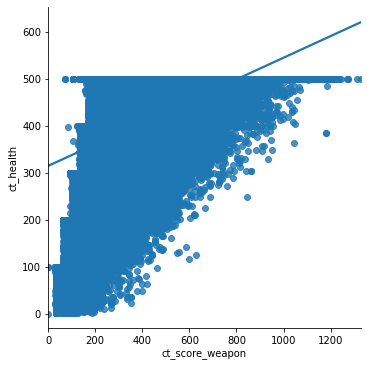

In [514]:
sns.lmplot(x="ct_score_weapon", y="ct_health", data=df);

In [515]:
df.corr(method="spearman")

time_left  ct_score   t_score  bomb_planted  ct_health  \
time_left            1.000000 -0.001715 -0.006346     -0.503731   0.790542   
ct_score            -0.001715  1.000000  0.600621     -0.017260   0.014934   
t_score             -0.006346  0.600621  1.000000     -0.008651   0.001386   
bomb_planted        -0.503731 -0.017260 -0.008651      1.000000  -0.525648   
ct_health            0.790542  0.014934  0.001386     -0.525648   1.000000   
t_health             0.804868 -0.007955  0.002690     -0.432503   0.834396   
ct_armor             0.012808  0.099301  0.043704     -0.293554   0.330882   
t_armor             -0.074975  0.041795  0.078527     -0.133246   0.146139   
ct_money             0.339545  0.209155  0.030578     -0.216675   0.334893   
t_money              0.291025  0.034596  0.217812     -0.118977   0.239231   
ct_helmets          -0.099215  0.191016 -0.011599     -0.161421   0.114592   
t_helmets           -0.176518  0.052888  0.138545     -0.067055   0.020036   
ct_defuse_kits      -0.061030  0.246231  0.033593     -0.137155   0.110252   
ct_players_alive     0.702255  0.013761 -0.000502     -0.559474   0.913533   
t_players_alive      0.680950 -0.011134 -0.001969     -0.406592   0.748601   
ct_score_weapon      0.146393  0.181180  0.076440     -0.336283   0.388857   
t_score_weapon       0.040816  0.052418  0.149180     -0.192142   0.210793   
norm_t_health        0.804868 -0.007955  0.002690     -0.432503   0.834396   
t_weapon_Rifels     -0.202805  0.089420  0.160568     -0.038146  -0.029984   
t_weapon_Pistols     0.639860 -0.012174 -0.005127     -0.373447   0.685962   
t_weapon_Heavy      -0.010121 -0.004033 -0.007148     -0.001871  -0.002590   
t_weapon_SMGs       -0.060084 -0.057335 -0.022846     -0.015470   0.004652   
t_weapon_Grenades    0.020745  0.044974  0.135561     -0.213590   0.169653   
ct_weapon_Rifels    -0.114441  0.203491  0.100528     -0.174120   0.135954   
ct_weapon_Pistols    0.649291  0.007844 -0.004209     -0.506649   0.817202   
ct_weapon_Heavy     -0.011245 -0.010924  0.017470     -0.022573   0.009742   
ct_weapon_SMGs      -0.058371 -0.030502 -0.042874     -0.071159   0.032543   
ct_weapon_Grenades   0.047025  0.181891  0.066869     -0.223212   0.243077   
tarm_heal            0.239682  0.025723  0.063426     -0.282259   0.442129   
ctarm_heal           0.287220  0.085129  0.032864     -0.439759   0.622298   
tscmoney             0.291003  0.036840  0.221581     -0.118976   0.239181   
ctscmoney            0.339518  0.213533  0.033302     -0.216648   0.334826   

                    t_health  ct_armor   t_armor  ct_money   t_money  \
time_left           0.804868  0.012808 -0.074975  0.339545  0.291025   
ct_score           -0.007955  0.099301  0.041795  0.209155  0.034596   
t_score             0.002690  0.043704  0.078527  0.030578  0.217812   
bomb_planted       -0.432503 -0.293554 -0.133246 -0.216675 -0.118977   
ct_health           0.834396  0.330882  0.146139  0.334893  0.239231   
t_health            1.000000  0.159155  0.246948  0.273860  0.318943   
ct_armor            0.159155  1.000000  0.382274 -0.102015 -0.101269   
t_armor             0.246948  0.382274  1.000000 -0.097696 -0.086665   
ct_money            0.273860 -0.102015 -0.097696  1.000000  0.287560   
t_money             0.318943 -0.101269 -0.086665  0.287560  1.000000   
ct_helmets         -0.028268  0.659677  0.191810  0.269280 -0.152757   
t_helmets           0.111675  0.282065  0.868743 -0.049219  0.146781   
ct_defuse_kits     -0.025219  0.564770  0.139477  0.355252 -0.140854   
ct_players_alive    0.755722  0.424242  0.180521  0.327862  0.196806   
t_players_alive     0.895604  0.198934  0.376705  0.223743  0.309543   
ct_score_weapon     0.245323  0.783983  0.339737  0.252657  0.071280   
t_score_weapon      0.304512  0.315243  0.811384 -0.010812  0.265365   
norm_t_health       1.000000  0.159155  0.246948  0.273860  0.318943   
t_weapon_Rifels     0.059227  0.248115  0.780774 -0.017958  0.180181   
t_wea

In [516]:
df.corr(method="pearson")

time_left  ct_score   t_score  bomb_planted  ct_health  \
time_left            1.000000  0.000381 -0.003067     -0.486048   0.684514   
ct_score             0.000381  1.000000  0.626726     -0.015707   0.016495   
t_score             -0.003067  0.626726  1.000000     -0.010080   0.002840   
bomb_planted        -0.486048 -0.015707 -0.010080      1.000000  -0.619132   
ct_health            0.684514  0.016495  0.002840     -0.619132   1.000000   
t_health             0.678952 -0.010987  0.001720     -0.448040   0.756167   
ct_armor            -0.089950  0.100518  0.035370     -0.281474   0.391429   
t_armor             -0.195579  0.034789  0.081671     -0.096619   0.140262   
ct_money             0.374530  0.249416  0.069768     -0.190107   0.306399   
t_money              0.341717  0.074700  0.258855     -0.125822   0.217013   
ct_helmets          -0.103505  0.181513 -0.006872     -0.178893   0.232493   
t_helmets           -0.248799  0.063146  0.136555     -0.045942   0.050752   
ct_defuse_kits      -0.063179  0.250983  0.057492     -0.153495   0.212200   
ct_players_alive     0.638904  0.014086  0.001216     -0.624645   0.971630   
t_players_alive      0.597630 -0.015219 -0.003452     -0.399239   0.679676   
ct_score_weapon      0.127368  0.176251  0.076302     -0.304013   0.456220   
t_score_weapon       0.022829  0.056477  0.147887     -0.202769   0.273801   
norm_t_health        0.678952 -0.010987  0.001720     -0.448040   0.756167   
t_weapon_Rifels     -0.249425  0.093247  0.158726     -0.025671   0.015332   
t_weapon_Pistols     0.587525 -0.017074 -0.004504     -0.381291   0.647564   
t_weapon_Heavy      -0.010546 -0.004306 -0.005769     -0.001871  -0.000659   
t_weapon_SMGs       -0.066544 -0.068159 -0.044825     -0.016950   0.036819   
t_weapon_Grenades    0.035877  0.047617  0.128388     -0.226998   0.274315   
ct_weapon_Rifels    -0.140156  0.199826  0.106157     -0.181710   0.239532   
ct_weapon_Pistols    0.623078  0.010962 -0.001760     -0.580145   0.907581   
ct_weapon_Heavy     -0.018761 -0.012083  0.022066     -0.022530   0.021383   
ct_weapon_SMGs      -0.065054 -0.041612 -0.049768     -0.077349   0.091478   
ct_weapon_Grenades   0.097169  0.162144  0.059047     -0.232422   0.350842   
tarm_heal            0.236947  0.017662  0.056452     -0.309766   0.507297   
ctarm_heal           0.296070  0.076304  0.025305     -0.512197   0.784713   
tscmoney             0.341681  0.074941  0.259225     -0.125813   0.216992   
ctscmoney            0.374490  0.249817  0.070029     -0.190093   0.306373   

                    t_health  ct_armor   t_armor  ct_money   t_money  \
time_left           0.678952 -0.089950 -0.195579  0.374530  0.341717   
ct_score           -0.010987  0.100518  0.034789  0.249416  0.074700   
t_score             0.001720  0.035370  0.081671  0.069768  0.258855   
bomb_planted       -0.448040 -0.281474 -0.096619 -0.190107 -0.125822   
ct_health           0.756167  0.391429  0.140262  0.306399  0.217013   
t_health            1.000000  0.166416  0.325604  0.236764  0.306772   
ct_armor            0.166416  1.000000  0.295957 -0.050308 -0.146743   
t_armor             0.325604  0.295957  1.000000 -0.168787 -0.064501   
ct_money            0.236764 -0.050308 -0.168787  1.000000  0.373822   
t_money             0.306772 -0.146743 -0.064501  0.373822  1.000000   
ct_helmets          0.053118  0.694576  0.129724  0.250290 -0.176026   
t_helmets           0.217716  0.224723  0.877626 -0.092709  0.109843   
ct_defuse_kits      0.045415  0.600815  0.117298  0.350686 -0.123818   
ct_players_alive    0.703245  0.425517  0.131680  0.300579  0.193102   
t_players_alive     0.955859  0.153158  0.384980  0.203329  0.300326   
ct_score_weapon     0.299660  0.747794  0.280143  0.219517  0.024834   
t_score_weapon      0.428175  0.257230  0.775228 -0.039727  0.235173   
norm_t_health       1.000000  0.166416  0.325604  0.236764  0.306772   
t_weapon_Rifels     0.180475  0.197614  0.800778 -0.067724  0.149413   
t_wea

In [517]:
df.corr(method="kendall")

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


time_left  ct_score   t_score  bomb_planted  ct_health  \
time_left            1.000000 -0.001200 -0.004398     -0.414607   0.626218   
ct_score            -0.001200  1.000000  0.450546     -0.014531   0.011292   
t_score             -0.004398  0.450546  1.000000     -0.007283   0.001011   
bomb_planted        -0.414607 -0.014531 -0.007283      1.000000  -0.472103   
ct_health            0.626218  0.011292  0.001011     -0.472103   1.000000   
t_health             0.627812 -0.005971  0.001977     -0.384016   0.702431   
ct_armor             0.030283  0.070127  0.030687     -0.245211   0.303239   
t_armor             -0.025685  0.029297  0.055010     -0.110870   0.121646   
ct_money             0.232307  0.145817  0.020570     -0.177309   0.251008   
t_money              0.198716  0.022983  0.152761     -0.097329   0.175380   
ct_helmets          -0.061656  0.143506 -0.008706     -0.143475   0.107846   
t_helmets           -0.108963  0.040004  0.104626     -0.060055   0.027023   
ct_defuse_kits      -0.040459  0.187471  0.025151     -0.122929   0.095204   
ct_players_alive     0.566575  0.010923 -0.000416     -0.527597   0.864187   
t_players_alive      0.541833 -0.008840 -0.001576     -0.382990   0.648416   
ct_score_weapon      0.115938  0.126518  0.053255     -0.276731   0.312247   
t_score_weapon       0.042470  0.036513  0.104367     -0.158034   0.161684   
norm_t_health        0.627812 -0.005971  0.001977     -0.384016   0.702431   
t_weapon_Rifels     -0.131955  0.067191  0.121822     -0.033986  -0.014568   
t_weapon_Pistols     0.505112 -0.009566 -0.004033     -0.348390   0.587538   
t_weapon_Heavy      -0.008330 -0.003395 -0.006018     -0.001871  -0.002326   
t_weapon_SMGs       -0.048043 -0.047288 -0.019135     -0.015137   0.004220   
t_weapon_Grenades    0.055549  0.032422  0.097981     -0.182676   0.143981   
ct_weapon_Rifels    -0.070070  0.153912  0.075347     -0.154417   0.138652   
ct_weapon_Pistols    0.517091  0.006143 -0.003314     -0.471350   0.753472   
ct_weapon_Heavy     -0.009254 -0.009194  0.014704     -0.022569   0.008748   
ct_weapon_SMGs      -0.045989 -0.025171 -0.035209     -0.069115   0.028851   
ct_weapon_Grenades   0.075336  0.131718  0.048399     -0.190944   0.212205   
tarm_heal            0.161957  0.017924  0.044374     -0.233566   0.333195   
ctarm_heal           0.193424  0.059603  0.022916     -0.364430   0.534386   
tscmoney             0.198397  0.024365  0.156056     -0.097162   0.175040   
ctscmoney            0.231860  0.149710  0.022287     -0.176930   0.250450   

                    t_health  ct_armor   t_armor  ct_money   t_money  \
time_left           0.627812  0.030283 -0.025685  0.232307  0.198716   
ct_score           -0.005971  0.070127  0.029297  0.145817  0.022983   
t_score             0.001977  0.030687  0.055010  0.020570  0.152761   
bomb_planted       -0.384016 -0.245211 -0.110870 -0.177309 -0.097329   
ct_health           0.702431  0.303239  0.121646  0.251008  0.175380   
t_health            1.000000  0.128820  0.245569  0.199603  0.237292   
ct_armor            0.128820  1.000000  0.268161 -0.071098 -0.069174   
t_armor             0.245569  0.268161  1.000000 -0.065952 -0.061932   
ct_money            0.199603 -0.071098 -0.065952  1.000000  0.199211   
t_money             0.237292 -0.069174 -0.061932  0.199211  1.000000   
ct_helmets         -0.017513  0.523197  0.145295  0.199566 -0.112657   
t_helmets           0.138857  0.209171  0.747466 -0.035390  0.108566   
ct_defuse_kits     -0.018128  0.444571  0.101386  0.274418 -0.103120   
ct_players_alive    0.649044  0.380418  0.146774  0.257907  0.150989   
t_players_alive     0.834245  0.160166  0.346114  0.172099  0.244525   
ct_score_weapon     0.186750  0.587207  0.236305  0.170753  0.046696   
t_score_weapon      0.249276  0.218437  0.606743 -0.007263  0.180642   
norm_t_health       1.000000  0.128820  0.245569  0.199603  0.237292   
t_weapon_Rifels     0.089054  0.180162  0.652922 -0.011987  0.133462   
t_wea

In [518]:
df.to_csv("output1.csv")

In [1]:
options(repr.plot.height = 15)
# simple function for plot similar graphics
weapon_plot <- function(column,title,fill,ylab){
    p = dt %>% group_by(match_id) %>% distinct(ct_score,t_score,.keep_all=TRUE) %>% 
    ungroup() %>% select(starts_with(column)) %>%
    gather(key=weapons,value=amount) %>%
    group_by(weapons) %>% mutate(amount = sum(amount)) %>% 
    ungroup() %>% unique() %>%
    mutate(percentage = round(amount / sum(amount),3)) %>%
    mutate(weapons = str_replace(weapons,column,'')) %>%
    ggplot(aes(y = reorder(weapons, -percentage),x = percentage)) +
    geom_col(color='black',fill=fill) + 
    geom_label_repel(aes(label = paste((percentage)*100,'%')))+
    scale_x_continuous(labels = scales::percent) +
    ggtitle(title)+
    ylab(ylab)+
    standard_theme
    
    return(p)
}

SyntaxError: invalid syntax (<ipython-input-1-f18c66327305>, line 3)